# **Ensemble Learning and Transfer Learning for Financial Price Prediction**

**Models Utilized:**
- *Bidirectional Probabilistic GRU (bi_gru_prob)*
- *Bidirectional Simple GRU (bi_gru_simple)*
- *Bidirectional GRU with Time-Distributed Dense (bi_gru_time_dist)*
- *Probabilistic GRU (gru_prob)*
- *Simple GRU (gru_simple)*
- *GRU with Time-Distributed Dense (gru_time_dist)*
- *Bidirectional Probabilistic LSTM (bi_lstm_prob)*
- *Bidirectional Simple LSTM (bi_lstm_simple)*
- *Bidirectional LSTM with Time-Distributed Dense (bi_lstm_time_dist)*
- *Probabilistic LSTM (lstm_prob)*
- *Simple LSTM (lstm_simple)*
- *LSTM with Time-Distributed Dense (lstm_time_dist)*

**Workflow Overview:**
1. **Data Preprocessing:**
   - *Download cryptocurrency price data, e.g., Bitcoin (BTC), using Yahoo Finance.*
   - *Normalize and split the data into training and testing sets.*

2. **Model Training:**
   - *Train various deep learning models (include probabilistic model) with different architectures on BTC price data.*
   - *Models include both GRU and LSTM variants.*

3. **Transfer Learning:**
   - *Utilize the best-performing model (e.g., gru_prob) as a pre-trained model.*
   - *Transfer this model to predict stock prices.*

4. **Evaluation and Analysis:**
   - *Evaluate model performance using metrics such as R2 score, Mean Absolute Percentage Error, and more.*
   - *Generate Residuals vs. Predicted Values plots for each model.*

5. **Reporting and Visualization:**
   - *Report and visualize the results, including prediction plots for different models.*


# Financial Time Series Analysis Setup. Import Necessary Libraries and Set Up the Environment for Financial Time Series Analysis.

## Install dependencies with correct version



TensorFlow: 2.15.1

Keras: 2.15.0

TensorFlow Probability: 0.23.0

In [ ]:
# !pip uninstall tensorflow
# !pip install tensorflow==2.15.1

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.3 MB/s eta 0:00:00

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.1


In [ ]:
!pip install keras==2.15.0

In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
!pip install tensorflow-probability==0.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.25.0
    Uninstalling tensorflow-probability-0.25.0:
      Successfully uninstalled tensorflow-probability-0.25.0


In [ ]:
import tensorflow_probability
print(tensorflow_probability.__version__)

0.23.0


## Import Dependencies

In [ ]:
"""
Libraries:
- os: Operating system interaction.
- numpy: Numerical operations.
- pytz: Time zone support.
- pandas: Data manipulation and analysis.
- glob: Unix-style pathname pattern expansion.
- matplotlib.pyplot: Plotting library.
- matplotlib.dates: Date plotting functionality.
- datetime: Date and time manipulation.
- time: Time-related functions.
- warnings: Warning control.
- sklearn.metrics: Metrics for model evaluation.
- tensorflow and keras: Deep learning frameworks.
- tensorflow_probability: Library for probabilistic modeling.

Note: Adjustments such as turning off TensorFlow warnings and installing required packages are included.
"""

import os
import numpy as np
import pytz
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime, timedelta
import time
import warnings
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_poisson_deviance as mpd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import PredictionErrorDisplay
import tensorflow as tf
import keras.backend as K
from keras.layers import Input, LSTM, Dense, BatchNormalization, Dropout
from keras.layers import Activation, TimeDistributed, Flatten, GRU, Bidirectional
from keras.models import Model, model_from_json, load_model
from keras.callbacks import Callback
from tensorflow_probability.python.layers import DistributionLambda
from tensorflow_probability.python.distributions import Normal

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings('ignore')
# plt.style.use('seaborn')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
%matplotlib inline

# install Yahoo finance

In [ ]:
%pip install yfinance

In [ ]:
import yfinance as yf

# Matplotlib Plotting Configuration

In [ ]:
"""
Description:
- Configure Matplotlib plotting settings for consistent and visually appealing financial time series plots.

Settings:
- Figure size: Adjust the default size for figures.
- Font size: Set the font size for text in plots.
- Axes title size: Define the title font size for axes.
- Axes label size: Specify the font size for axes labels.
- X-axis tick label size: Set the font size for tick labels on the x-axis.
- Y-axis tick label size: Set the font size for tick labels on the y-axis.
- Legend font size: Adjust the font size for legends.

Usage:
- Apply these settings at the beginning of financial time series analysis scripts to enhance plot readability.
"""
plt.rcParams.update({'figure.figsize': [18, 6],
                     'font.size':       16,
                     'axes.titlesize':  16,
                     'axes.labelsize':  16,
                     'xtick.labelsize': 16,
                     'ytick.labelsize': 16,
                     'legend.fontsize': 16})

# Download Price Data from Yahoo Finance

In [ ]:
def download_price_data(timezone = None, date_format = '%Y-%m-%d %H:%M', tickers = 'BTC-USD'):
    """
    Description:
    - Fetch historical price data for specified tickers from Yahoo Finance.
    - Adjusts the data for a specific timezone and custom date format.

    Parameters:
    - timezone (str): Target timezone for data conversion.
    - date_format (str): Custom date format for the 'Datetime' column.
    - tickers (str or list): Ticker symbols of financial instruments to download.

    Returns:
    - pd.DataFrame: Historical price data with adjusted datetime and 'AdjClose' column.

    Note:
    - Ensure 'yfinance' library is installed using '%pip install yfinance'.
    """
    d = yf.download(tickers = tickers,
                    start = datetime.now() - timedelta(days = 60) + timedelta(minutes = 5),
                    end = datetime.now(), interval = '5m')
    d = (d.tz_convert(timezone)).rename(columns = {'Adj Close': 'AdjClose'}).copy(deep = True)
    d['Datetime'] = pd.date_range(start = datetime.strftime(d.index[0], date_format), periods = len(d), freq = '5min')
    d['Datetime'] = d['Datetime'].dt.strftime(date_format)
    d.set_index('Datetime', inplace = True)
    print(f'Downloaded from {d.index[0]} to {d.index[-1]} with total {len(d.index)} samples')
    return d

# Set Iran Timezone and Date Format

In [ ]:
"""
Description:
- Defines the timezone for Iran and a custom date format.

Variables:
- iran_timezone (pytz.timezone): Represents the timezone for Iran.
- dateformat (str): Custom date format to be used in datetime manipulations.
"""
iran_timezone = pytz.timezone(zone = 'Iran')
dateformat = '%Y-%m-%d %H:%M'

# Download BTC Price Data. Visualizing Downloaded Data

In [ ]:
"""
Description:
- Downloads historical price data for a specified cryptocurrency (default is BTC-USD).
- The data is fetched within the last 60 days with a 5-minute interval.

Parameters:
- timezone (pytz.timezone): Timezone to convert the data timestamps.
- date_format (str): Custom date format for timestamp display.
- tickers (str): Cryptocurrency ticker symbol. (default is BTC-USD)

Returns:
- pd.DataFrame: Historical price data with adjusted close values and timestamps.
"""
data = download_price_data(timezone = iran_timezone, date_format = dateformat)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Downloaded from 2025-01-26 08:00 to 2025-03-27 07:50 with total 17279 samples


In [ ]:
data.columns = ['Open','High','Low','Close','Volume']

In [ ]:
data

Open           High            Low          Close  \
Datetime                                                                       
2025-01-26 08:00  105275.453125  105339.523438  105243.421875  105339.523438   
2025-01-26 08:05  105176.976562  105279.390625  105176.976562  105279.390625   
2025-01-26 08:10  105176.820312  105191.046875  105154.046875  105154.046875   
2025-01-26 08:15  105181.468750  105187.281250  105177.468750  105177.468750   
2025-01-26 08:20  105111.593750  105176.968750  105111.593750  105176.968750   
...                         ...            ...            ...            ...   
2025-03-27 07:30   87534.203125   87689.179688   87534.203125   87689.179688   
2025-03-27 07:35   87481.218750   87539.320312   87481.218750   87539.320312   
2025-03-27 07:40   87503.773438   87503.773438   87468.453125   87489.109375   
2025-03-27 07:45   87530.781250   87566.312500   87530.781250   87566.312500   
2025-03-27 07:50   87529.546875   87543.281250   87483.390625   87543.281250   

                     Volume  
Datetime                     
2025-01-26 08:00          0  
2025-01-26 08:05   34109440  
2025-01-26 08:10   22337536  
2025-01-26 08:15   13529088  
2025-01-26 08:20    5447680  
...                     ...  
2025-03-27 07:30          0  
2025-03-27 07:35  146409472  
2025-03-27 07:40   31920128  
2025-03-27 07:45   27359232  
2025-03-27 07:50  150036480  

[17279 rows x 5 columns]

# Plot Downloaded BTC Price Data

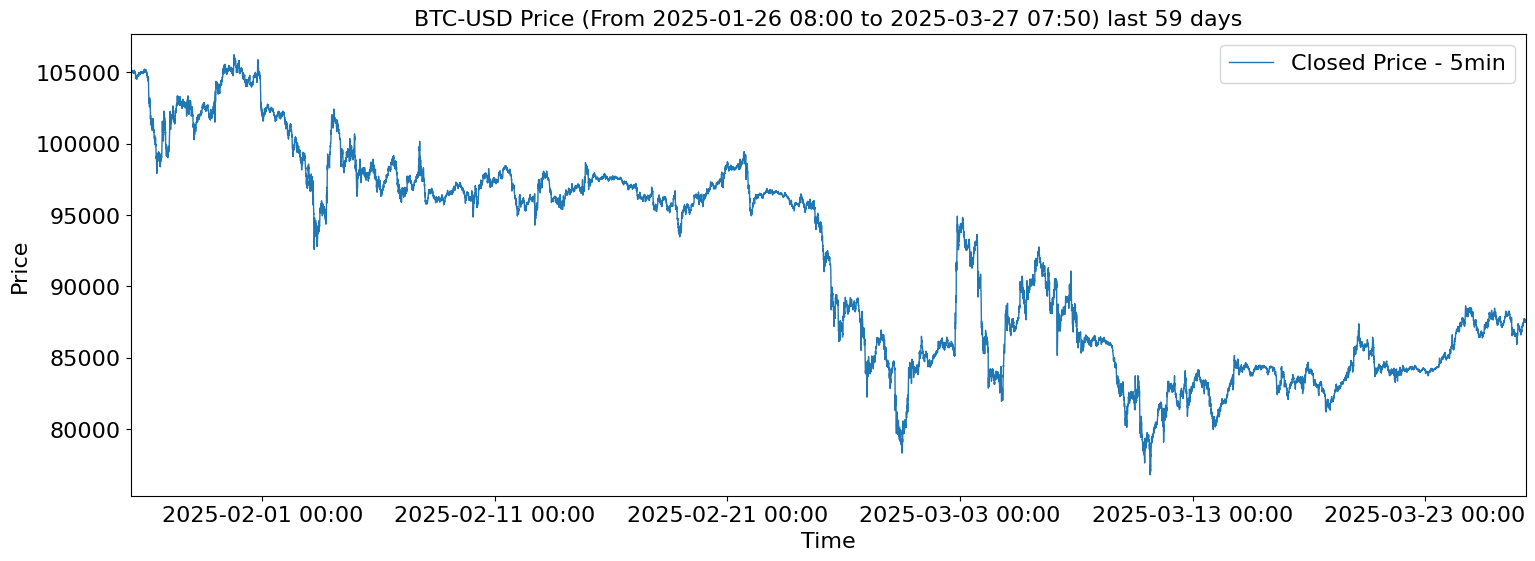

In [ ]:
"""
Description:
- Plots the historical closed price of a cryptocurrency.
- The x-axis is formatted with a custom date formatter.

Parameters:
- data (pd.DataFrame): Historical price data with timestamps and closed prices.
- dateformat (str): Custom date format for timestamp display.
"""
dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index]

plt.gca().xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
plt.plot(dates, list(data['Close']), label = 'Closed Price - 5min', linewidth = 1)
plt.xlim([dates[0], dates[-1]])
plt.title('BTC-USD Price (From {} to {}) last {} days'
.format(data.index[0], data.index[-1], (datetime.strptime(data.index[-1], dateformat) - datetime.strptime(data.index[0], dateformat)).days))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Methods For Normalize And Denormalize Data

In [ ]:
def normalize(x_, minmax):
    """
    Description:
    - Normalizes input data within the specified min-max range.

    Parameters:
    - x_ (np.ndarray): Input data to be normalized.
    - minmax (np.ndarray): Array containing the minimum and maximum values.

    Returns:
    - np.ndarray: Normalized data.
    """
    return (x_ - minmax[0]) / (minmax[1] - minmax[0])

def denormalize(x_, minmax):
    """
    Description:
    - Denormalizes input data based on the specified min-max range.

    Parameters:
    - x_ (np.ndarray): Input data to be denormalized.
    - minmax (np.ndarray): Array containing the minimum and maximum values used.

    Returns:
    - np.ndarray: Denormalized data.
    """
    return minmax[0] + ((minmax[1] - minmax[0]) * x_)

# Bidirectional Probabilistic GRU

In [ ]:
def bi_gru_prob(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Probabilistic Gated Recurrent Unit (GRU) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Probabilistic GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Bidirectional Simple GRU Model with Regularization and Batch Normalization

In [ ]:
def bi_gru_simple(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Simple Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Simple GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Bidirectional Time Distributed GRU Model with Regularization and Batch Normalization

In [ ]:
def bi_gru_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Time Distributed Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Time Distributed GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True))(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_gru_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Probabilistic GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_prob(shape = None, name = None):
    """
    Description:
    - Construct a Probabilistic Gated Recurrent Unit (GRU) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Probabilistic GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Simple GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_simple(shape = None, name = None):
    """
    Description:
    - Construct a Simple Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Simple GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Time Distributed GRU Model with Regularization and Batch Normalization

In [ ]:
def gru_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Time Distributed Gated Recurrent Unit (GRU) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Time Distributed GRU model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = GRU(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True)(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'gru_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Bidirectional Probabilistic LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_prob(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Probabilistic Long Short-Term Memory (LSTM) model with regularization, batch normalization,
    and distribution output. The distribution is defined as a Normal distribution with the predicted values (loc)
    and a scale parameter derived from a softplus function applied to the predicted values. This approach is employed
    for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Probabilistic LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Bidirectional Simple LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_simple(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Simple Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Simple LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg))(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Bidirectional Time Distributed LSTM Model with Regularization and Batch Normalization

In [ ]:
def bi_lstm_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Bidirectional Time Distributed Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Bidirectional Time Distributed LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = Bidirectional(LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True))(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'bi_lstm_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Probabilistic LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_prob(shape = None, name = None):
    """
    Description:
    - Construct a Probabilistic Long Short-Term Memory (LSTM) model with regularization, batch normalization, and distribution output.
    The distribution is defined as a Normal distribution with the predicted values (loc) and a scale parameter derived from a softplus
    function applied to the predicted values. This approach is employed for probabilistic predictions in the context of the model.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Probabilistic LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)

    # Output a probabilistic distribution using DistributionLambda
    O = DistributionLambda(lambda t: Normal(loc = t, scale = 1e-2 * tf.math.softplus(1e-2 * t), validate_args = True, allow_nan_stats = False))(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_prob_{name}')
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Simple LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_simple(shape = None, name = None):
    """
    Description:
    - Construct a simple Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Simple LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg)(I)
    h = BatchNormalization()(h)
    h = Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    h = Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg)(h)
    h = BatchNormalization()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_simple_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

# Time Distributed LSTM Model with Regularization and Batch Normalization

In [ ]:
def lstm_time_dist(shape = None, name = None):
    """
    Description:
    - Construct a Time Distributed Long Short-Term Memory (LSTM) model with regularization and batch normalization.

    Parameters:
    - shape (tuple): Input shape for the model.
    - name (str): Name to identify the model.

    Returns:
    - tf.keras.Model: Compiled Time Distributed LSTM model.
    """
    # Set up L1 regularization
    rg = tf.keras.regularizers.l1(l1 = 1e-3)

    # Define model architecture
    I = Input(shape = shape, name = 'close_price')
    h = LSTM(units = 256, kernel_regularizer = rg, bias_regularizer = rg, recurrent_regularizer = rg, return_sequences = True)(I)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 64, activation = 'sigmoid', kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = TimeDistributed(Dense(units = 1, kernel_regularizer = rg, bias_regularizer = rg))(h)
    h = BatchNormalization()(h)
    h = Flatten()(h)
    O = Activation('sigmoid')(h)

    # Compile the model
    m = Model(inputs = I, outputs = O, name = f'lstm_time_dist_{name}')
    m.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3), loss = 'mae', metrics = None)
    return m

## Method for Retrieving the Index of a Specific Layer.

In [ ]:
def get_layer_index(model_layers, layer_name):
    for idx, layer in enumerate(model_layers):
        if layer.name == layer_name:
            return idx

# Define a Custom Callback to Monitor and Track the R2-Score on the Validation Dataset.

In [ ]:
class TrainingCallback(Callback):
    """
    Description:
    - [TrainingCallback] Custom Callback for Monitoring and Managing Training Process
    This callback monitors the training process, tracks the R2 score, and saves the best model based on R2 improvement on validation dataset.

    Parameters:
    - check_best (bool): Whether to check and save the best model based on the highest R2 score.
    - change_lr (bool): Whether to change the learning rate during training.
    - change_lr_freq (int): Frequency of learning rate changes.
    - model_dir (str): Directory to save the best model and training history.
    - model_name (str): Name of the best model file.
    - valid_data (tuple): Validation data in the form of (valid_X, valid_y).
    - model (tf.keras.Model): The main model being trained.

    Methods:
    - on_train_begin: Called at the start of training.
    - on_train_end: Called at the end of training.
    - on_epoch_begin: Called at the beginning of each epoch.
    - on_epoch_end: Called at the end of each epoch.

    The callback saves the best model based on R2 score and logs the training progress in a text file.
    """
    def __init__(self,
                 check_best = True,
                 model_dir = None,
                 model_name = 'best_r2_model',
                 valid_data = None,
                 model = None):
        super(TrainingCallback).__init__()
        if valid_data is None: raise ValueError('You have to define validation data: e.g. valid_data = (valid_X, valid_y)!')
        if model is None: raise ValueError('You have to define model: e.g. model = your_model_name!')
        self.check_best = check_best
        self.price_r2, self.valid_X, self.valid_y = 0.0, valid_data[0], valid_data[1]
        if model_dir is None:
            self.best_model_dir = os.path.join(os.getcwd(), 'best_model').replace('\\', '/')
        else:
            self.best_model_dir = model_dir
        if not os.path.isdir(self.best_model_dir): os.makedirs(self.best_model_dir)
        self.best_model_name = model_name
        self.save_best = False
        self.model = model
        self.model_ = None
        self.time = 0
        self.text_file = None

    def on_train_begin(self, logs = None, **kwargs):
        self.text_file = open(f'{self.best_model_dir}_history.txt', 'w')
        if self.check_best:
            self.model.save(f'{self.best_model_dir}/{self.best_model_name}.keras')
            self.model_ = load_model(f'{self.best_model_dir}/{self.best_model_name}.keras', safe_mode = False)
        c = {True: 'On', False: 'Off'}
        text = f'Training started. Checking the best model based on the highest R2-score is {c[self.check_best]}'
        self.text_file.writelines(text + '\n')
        print(text)

    def on_train_end(self, logs = None, **kwargs):
        self.text_file.close()

    def on_epoch_begin(self, epoch, logs = None, **kwargs):
        self.time = time.time()

    def on_epoch_end(self, epoch, logs = None, **kwargs):
        if self.check_best:
            price_check = 'Model Weights Not Changed'
            self.save_best = False
            pred_ = self.model.predict(self.valid_X)
            if np.array(pred_.shape).shape[0] > 1:
                price_r2_ = r2_score(self.valid_y.flatten(), np.mean(pred_, axis = 1))
            else:
                price_r2_ = r2_score(self.valid_y, pred_)
            if price_r2_ > self.price_r2:
                self.model_ = load_model(f'{self.best_model_dir}/{self.best_model_name}.keras', safe_mode = False)
                price_check = 'Model Weights Changed'
                self.price_r2, self.save_best = price_r2_, True
                for layer in self.model.layers:
                    if layer.weights:
                        layer_idx = get_layer_index(self.model_.layers, layer.name)
                        self.model_.layers[layer_idx].set_weights(self.model.layers[layer_idx].get_weights())
            if self.params['epochs'] > 9:
                e = str(int((10 * self.params['epochs']) + epoch + 1))[1:]
            else:
                e = epoch + 1
            t = str(timedelta(seconds = int(time.time() - self.time)))
            if self.save_best:
                self.model_.save(f'{self.best_model_dir}/{self.best_model_name}.keras')
                if 'val_loss' in logs.keys():
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f}, val_loss: {:.4f} | {} And Best Model Saved'.format(e,
                                                                                                                                          self.params['epochs'],
                                                                                                                                          t,
                                                                                                                                          price_r2_,
                                                                                                                                          logs['loss'],
                                                                                                                                          logs['val_loss'],
                                                                                                                                          price_check)
                else:
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f} | {} And Best Model Saved'.format(e,
                                                                                                                        self.params['epochs'],
                                                                                                                        t, price_r2_,
                                                                                                                        logs['loss'],
                                                                                                                        price_check)
            else:
                if 'val_loss' in logs.keys():
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f}, val_loss: {:.4f} | {}'.format(e,
                                                                                                                     self.params['epochs'],
                                                                                                                     t,
                                                                                                                     price_r2_,
                                                                                                                     logs['loss'],
                                                                                                                     logs['val_loss'],
                                                                                                                     price_check)
                else:
                    text = 'Epoch: {}/{} | {} | Price R2 score: {:.4f} | loss: {:.4f} | {}'.format(e,
                                                                                                   self.params['epochs'],
                                                                                                   t,
                                                                                                   price_r2_,
                                                                                                   logs['loss'],
                                                                                                   price_check)
            self.text_file.writelines(text + '\n')
            print(text)

# Transfer Model for Probabilistic Prediction with Fine-Tuning (trained model on BTC price data)

In [ ]:
def transfer_model(transfer_model_path = None, transfer_model_name = None, name = 'best_TRXPred_gru_prob'):
    """
    Description:
    - Load a pre-trained model, freeze layers, and create a new model for transfer learning with fine-tuning.

    Parameters:
    - transfer_model_path (str): Path to the directory containing the pre-trained model.
    - transfer_model_name (str): Name of the pre-trained model file.
    - name (str): Name for the new transfer model.

    Returns:
    - tf.keras.Model: Compiled transfer model with fine-tuning for probabilistic prediction.
    """
    # Default values for transfer model path and name
    if transfer_model_path is None:
        transfer_model_path = 'best_BTCPred_gru_prob'
    if transfer_model_name is None:
        transfer_model_name = 'best_BTCPred_gru_prob'

    # Load the pre-trained model
    m = load_model(f'{transfer_model_path}/{transfer_model_name}.keras', safe_mode = False)

    # Freeze layers except the last one
    for layer in m.layers[:-3]:
        layer.trainable = False

    # Set a new name for the transfer model
    m._name = name

    # Compile the transfer model with a specified optimizer and loss function (NLL)
    m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = lambda y, p: -p.log_prob(y), metrics = None)
    return m

# Data Splitting for Time Series Prediction

In [ ]:
def split_data(close_price = None, training_len = None, testing_len = None, analyzing_duration = None):
    """
    Description:
    - Split time series data into training and testing sets for sequence prediction.

    Parameters:
    - close_price (numpy.ndarray): Time series data of closing prices.
    - training_len (int): Length of the training set.
    - testing_len (int): Length of the testing set.
    - analyzing_duration (int): Duration of the sequence used for prediction.

    Returns:
    - tuple: Tuple containing training and testing sets (train_X, train_y, test_X, test_y).
      - train_X (numpy.ndarray): Training input sequences.
      - train_y (numpy.ndarray): Training output values.
      - test_X (numpy.ndarray): Testing input sequences.
      - test_y (numpy.ndarray): Testing output values.
    """
    # Initialize lists to store training and testing data
    train_X, train_y = [], []
    test_X, test_y = [], []

    # Generate training sequences and corresponding output values
    for idx in range(training_len - analyzing_duration):
        train_X.append(close_price[idx:analyzing_duration + idx].reshape(analyzing_duration))
        train_y.append(close_price[idx + analyzing_duration])

    # Reshape training data into the required format
    train_X, train_y = np.asarray(train_X).reshape((len(train_X), analyzing_duration, 1)), np.asarray(train_y)

    # Generate testing sequences and corresponding output values
    for idx in range(training_len - analyzing_duration, training_len + testing_len - analyzing_duration):
        test_X.append(close_price[idx:analyzing_duration + idx].reshape(analyzing_duration))
        test_y.append(close_price[idx + analyzing_duration])

    # Reshape testing data into the required format
    test_X, test_y = np.asarray(test_X).reshape((len(test_X), analyzing_duration, 1)), np.asarray(test_y)
    return train_X, train_y, test_X, test_y

# Plotting Time Series Prediction Results

In [ ]:
def plot_prediction(y_train, y_test, y_pred, model_name = None):
    """
    Description:
    - Generate a plot to visualize the results of time series prediction.

    Parameters:
    - y_train (numpy.ndarray): True values of the training set.
    - y_test (numpy.ndarray): True values of the testing set.
    - y_pred (numpy.ndarray): Predicted values, including mean and optional confidence interval.
    - model_name (str): Name of the model for plot title.

    Returns:
    - None: Displays the generated plot.
    """
    # Set up plot parameters
    plt.rcParams.update({'figure.figsize': [18, 6]})

    dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index[-len(y_test):]]

    fig, ax = plt.subplots(1)

    ax.xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
    ax.plot(dates, denormalize(y_test, close_minmax), label = 'Test', color = 'k', linewidth = 1)
    ax.plot(dates, denormalize(y_pred.mean(axis = 1), close_minmax), label = 'Prediction', color = 'r', linewidth = 1)
    if y_pred.shape[1] > 1:
        ax.fill_between(dates, denormalize(y_pred.mean(axis = 1) + .5 * y_pred.std(axis = 1), close_minmax),
                        denormalize(y_pred.mean(axis = 1) - .5 * y_pred.std(axis = 1), close_minmax),
                        alpha = .25, label = 'Prediction Bounds', color = 'c')
    ax.set_xlim([dates[0], dates[-1]])
    ax.set_title(f'Best Model: {model_name}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    ax.tick_params(axis = 'x', rotation = 15)
    ax.legend()
    plt.show()

# Base Models Dictionary

In [ ]:
"""
Description:
- Dictionary containing base model names as keys and corresponding model functions as values.
These models are used as building blocks for constructing more complex models and architectures in the workflow.
"""
base_models_list = {
    'bi_gru_prob':          bi_gru_prob,
    'bi_gru_simple':        bi_gru_simple,
    'bi_gru_time_dist':     bi_gru_time_dist,
    'gru_prob':             gru_prob,
    'gru_simple':           gru_simple,
    'gru_time_dist':        gru_time_dist,
    'bi_lstm_prob':         bi_lstm_prob,
    'bi_lstm_simple':       bi_lstm_simple,
    'bi_lstm_time_dist':    bi_lstm_time_dist,
    'lstm_prob':            lstm_prob,
    'lstm_simple':          lstm_simple,
    'lstm_time_dist':       lstm_time_dist
}

# Model Training Configuration

In [ ]:
"""
Description:
- Configuration settings for training the time series prediction models.

Parameters:
- test_split_percentage (float): Percentage of data reserved for testing.
- validation_split_percentage (float): Percentage of training data used for validation.
- epochs (int): Number of training epochs.
- batch_size (int): Batch size for training.
- verbose (int): Verbosity level during training (0 for silent).
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
test_split_percentage = .8
validation_split_percentage = .2
epochs = 20
batch_size = 32
verbose = 0
analysis_duration = 6
price_pairs = 'BTCUSD'

# Price Preprocessing and Normalization Parameters

In [ ]:
"""
Parameters for normalizing cryptocurrency closing prices:
- alpha (float): Scaling factor for the minimum value.
- beta (float): Scaling factor for the maximum value.
- close_price (numpy.ndarray): NumPy array containing closing prices.
- data_len (int): Total length of the price data.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
"""
alpha, beta = .8, 1.2
close_price = pd.Series.to_numpy(data['Close'])
data_len = close_price.shape[0]
train_len = int((test_split_percentage * data_len) // analysis_duration * analysis_duration)
test_len = int(data_len - train_len)
close_minmax = np.array([alpha * close_price.min(), beta * close_price.max()], dtype = 'float32')

# Price Normalization and Save

In [ ]:
"""
Description:
- Normalize the closing prices of cryptocurrency data and save the min-max normalization range.

Parameters:
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- data_len (int): Total length of the price data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
close_price = close_price.reshape((data_len, 1)).astype('float32')
close_price = normalize(close_price, close_minmax)
np.save(f'close_minmax_{price_pairs.lower()}.npy', close_minmax)

# Data Splitting for Training and Validation

In [ ]:
"""
Description:
- Split the time series data into training, testing, and validation sets for model training.

Parameters:
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and testing data split.
- X_val, y_val (numpy.ndarray): Validation data split from the training set.
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- validation_split_percentage (float): Percentage of training data used for validation.
- analyzing_duration (int): Duration of the sequence used for prediction.
"""
X_train, y_train, X_test, y_test = split_data(close_price = close_price,
                                              training_len = train_len,
                                              testing_len = test_len,
                                              analyzing_duration = analysis_duration)
X_val, y_val = X_train[int(train_len - (validation_split_percentage * train_len)):], y_train[int(train_len - (validation_split_percentage * train_len)):]
X_train, y_train = X_train[:int(train_len - (validation_split_percentage * train_len))], y_train[:int(train_len - (validation_split_percentage * train_len))]

# Train Multiple Base Models, Evaluate Their Performance on the Test Set, and Store the Results.

In [ ]:
"""
Parameters:
- base_models_list (dict): Dictionary containing base model functions.
- X_train, y_train (numpy.ndarray): Training data and labels.
- X_test, y_test (numpy.ndarray): Testing data and labels.
- X_val, y_val (numpy.ndarray): Validation data and labels.
- close_minmax (numpy.ndarray): Min-max values for denormalization.
- epochs (int): Number of training epochs.
- batch_size (int): Size of each training batch.
- verbose (int): Verbosity mode for training output.
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): String identifier for the price pair.

Returns:
- y_pred_best (dict): Predictions from the best models.
- models_test_result (dict): Evaluation metrics for each trained model on the test set.
"""

y_pred_best, models_test_result = {}, {}

for selected_model in list(base_models_list.items()):
    m_name_ = f'best_{price_pairs[:3]}Pred_{selected_model[0]}'
    models_test_result.update({f'{m_name_}': {}})
    if os.path.isfile(f'{m_name_[:-2]}_history.npy'):
        continue
    out_path = m_name_.replace('best_', '')
    if not os.path.isdir(out_path): os.makedirs(out_path)
    out_path_best = m_name_

    K.clear_session()
    model = selected_model[1](**{'shape': X_train.shape[1:], 'name': price_pairs.lower()})
    model.summary(line_length = 140)

    tbcall = TrainingCallback(model_dir = out_path_best,
                              valid_data = (X_val, y_val),
                              model = model, model_name = m_name_)

    model_history = model.fit(X_train, y_train,
                              epochs = epochs, batch_size = batch_size, callbacks = tbcall, verbose = verbose)

    model.save(f'{out_path}/{m_name_.replace("best", "fulltrained")}.keras')
    best_model = load_model(f'{out_path_best}/{m_name_}.keras', safe_mode = False)

    test_p = model.predict(X_test)
    test_p_best = best_model.predict(X_test)
    y_pred_best.update({f'{m_name_}': test_p_best})

    models_test_result[f'{m_name_}'].update({'r2_score': float(r2_score(denormalize(y_test, close_minmax),
                                                                        denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_absolute_percentage_error': float(mape(denormalize(y_test, close_minmax),
                                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'explained_variance_score': float(evs(denormalize(y_test, close_minmax),
                                                                                   denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_squared_log_error': float(msle(denormalize(y_test, close_minmax),
                                                                                  denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_poisson_deviance': float(mpd(denormalize(y_test, close_minmax),
                                                                                denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'max_error': float(max_error(denormalize(y_test, close_minmax),
                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'mean_absolute_error': float(mae(denormalize(y_test, close_minmax),
                                                                              denormalize(test_p_best.mean(axis = 1), close_minmax)))})
    models_test_result[f'{m_name_}'].update({'root_mean_squared_error': float(rmse(denormalize(y_test, close_minmax),
                                                                                   denormalize(test_p_best.mean(axis = 1), close_minmax)))})

Model: "bi_gru_prob_btcusd"
____________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              
 close_price (InputLayer)                                      [(None, 6, 1)]                                          0                    
                                                                                                                                            
 bidirectional (Bidirectional)                                 (None, 512)                                             397824               
                                                                                                                                            
 batch_normalization (BatchNormalization)                      (None, 512)                                             2048   

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 3s 15ms/step


Epoch: 01/20 | 0:00:23 | Price R2 score: 0.0518 | loss: 1550.0308 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 11ms/step
Epoch: 02/20 | 0:00:14 | Price R2 score: 0.7415 | loss: 238.8228 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 10ms/step
Epoch: 03/20 | 0:00:08 | Price R2 score: -6.6390 | loss: 25.4849 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 04/20 | 0:00:08 | Price R2 score: -22.4832 | loss: 8.5958 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 05/20 | 0:00:08 | Price R2 score: -5.7731 | loss: 6.1749 | Model Weights Not Changed
87/87 [==============================] - 1s 9ms/step
Epoch: 06/20 | 0:00:08 | Price R2 score: 0.6802 | loss: 4.0248 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 07/20 | 0:00:07 | Price R2 score: -3.3504 | loss: 3.8730 | Model Weights Not Change

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 6ms/step
Epoch: 01/20 | 0:00:12 | Price R2 score: -11.2436 | loss: 1.0865 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 02/20 | 0:00:08 | Price R2 score: -6.1095 | loss: 0.2244 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step


Epoch: 03/20 | 0:00:08 | Price R2 score: 0.5594 | loss: 0.2193 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 04/20 | 0:00:09 | Price R2 score: 0.9858 | loss: 0.2195 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:08 | Price R2 score: 0.8926 | loss: 0.2197 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 06/20 | 0:00:06 | Price R2 score: 0.9589 | loss: 0.2189 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 07/20 | 0:00:09 | Price R2 score: 0.9621 | loss: 0.2195 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 08/20 | 0:00:07 | Price R2 score: 0.9764 | loss: 0.2196 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 09/20 | 0:00:06 | Price R2 score: 0.9634 | loss: 0.2183 | Model Weights Not Changed
87/87 [====

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 6ms/step
Epoch: 01/20 | 0:00:13 | Price R2 score: -7.9134 | loss: 1.1177 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 02/20 | 0:00:08 | Price R2 score: -8.3633 | loss: 0.2416 | Model Weights Not Changed
87/87 [==============================] - 1s 11ms/step


Epoch: 03/20 | 0:00:09 | Price R2 score: 0.6803 | loss: 0.2232 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 04/20 | 0:00:08 | Price R2 score: 0.9370 | loss: 0.2221 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 05/20 | 0:00:08 | Price R2 score: 0.8902 | loss: 0.2222 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 06/20 | 0:00:09 | Price R2 score: 0.9499 | loss: 0.2213 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 10ms/step
Epoch: 07/20 | 0:00:09 | Price R2 score: 0.9785 | loss: 0.2208 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 08/20 | 0:00:07 | Price R2 score: 0.8955 | loss: 0.2212 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 09/20 | 0:00:09 | Price R2 score: 0.2689 | loss: 0.2210 | Mo

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 4ms/step
Epoch: 01/20 | 0:00:07 | Price R2 score: -0.0271 | loss: 1521.7384 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step


Epoch: 02/20 | 0:00:04 | Price R2 score: 0.7412 | loss: 233.6930 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 03/20 | 0:00:05 | Price R2 score: 0.3946 | loss: 21.1408 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 04/20 | 0:00:04 | Price R2 score: -2.3763 | loss: 3.5443 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 05/20 | 0:00:05 | Price R2 score: -22.5620 | loss: 3.4750 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 06/20 | 0:00:04 | Price R2 score: 0.1152 | loss: 2.2339 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 07/20 | 0:00:04 | Price R2 score: -9.1648 | loss: 7.2767 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 08/20 | 0:00:05 | Price R2 score: 0.9938 | loss: 1.4943 | Model Weights Changed And Best Model Saved
87/8

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 4ms/step
Epoch: 01/20 | 0:00:07 | Price R2 score: -8.3761 | loss: 0.7002 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 02/20 | 0:00:05 | Price R2 score: -5.8728 | loss: 0.1383 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step


Epoch: 03/20 | 0:00:04 | Price R2 score: 0.7570 | loss: 0.1178 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 04/20 | 0:00:05 | Price R2 score: 0.8713 | loss: 0.1167 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 05/20 | 0:00:04 | Price R2 score: 0.9941 | loss: 0.1167 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 06/20 | 0:00:04 | Price R2 score: 0.8351 | loss: 0.1167 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 07/20 | 0:00:04 | Price R2 score: 0.9800 | loss: 0.1163 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 08/20 | 0:00:04 | Price R2 score: 0.9880 | loss: 0.1167 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 09/20 | 0:00:04 | Price R2 score: 0.9114 | loss: 0.1170 | Model Weights Not Ch

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 2s 8ms/step
Epoch: 01/20 | 0:00:08 | Price R2 score: -7.0579 | loss: 0.7221 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 02/20 | 0:00:04 | Price R2 score: -6.4893 | loss: 0.1473 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 03/20 | 0:00:04 | Price R2 score: -2.0792 | loss: 0.1262 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step


Epoch: 04/20 | 0:00:05 | Price R2 score: 0.7441 | loss: 0.1210 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 05/20 | 0:00:04 | Price R2 score: 0.8214 | loss: 0.1199 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 06/20 | 0:00:05 | Price R2 score: 0.8253 | loss: 0.1185 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 07/20 | 0:00:04 | Price R2 score: 0.7981 | loss: 0.1188 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 08/20 | 0:00:04 | Price R2 score: -1.5105 | loss: 0.1190 | Model Weights Not Changed
87/87 [==============================] - 0s 4ms/step
Epoch: 09/20 | 0:00:05 | Price R2 score: 0.9874 | loss: 0.1188 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 4ms/step
Epoch: 10/20 | 0:00:04 | Price R2 score: 0.5110 | loss: 0.1189 | Mo

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 2s 13ms/step
Epoch: 01/20 | 0:00:16 | Price R2 score: -0.0119 | loss: 1515.0813 | Model Weights Not Changed
87/87 [==============================] - 1s 9ms/step


Epoch: 02/20 | 0:00:10 | Price R2 score: 0.6792 | loss: 238.4636 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 03/20 | 0:00:09 | Price R2 score: -9.7380 | loss: 25.6344 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 04/20 | 0:00:10 | Price R2 score: -5.4183 | loss: 6.2913 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 05/20 | 0:00:10 | Price R2 score: -3.6779 | loss: 4.8412 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 06/20 | 0:00:09 | Price R2 score: -6.2896 | loss: 6.4381 | Model Weights Not Changed
87/87 [==============================] - 1s 11ms/step
Epoch: 07/20 | 0:00:11 | Price R2 score: 0.8299 | loss: 3.8505 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 12ms/step
Epoch: 08/20 | 0:00:11 | Price R2 score: 0.9359 | loss: 3.4596 | Model Weights Changed And Be

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 8ms/step
Epoch: 01/20 | 0:00:15 | Price R2 score: -8.9920 | loss: 1.5566 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 02/20 | 0:00:10 | Price R2 score: -5.1886 | loss: 0.5534 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step


Epoch: 03/20 | 0:00:10 | Price R2 score: 0.8142 | loss: 0.3735 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 04/20 | 0:00:11 | Price R2 score: 0.9765 | loss: 0.2842 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 05/20 | 0:00:09 | Price R2 score: 0.9632 | loss: 0.2819 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 06/20 | 0:00:10 | Price R2 score: 0.9920 | loss: 0.2820 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 7ms/step
Epoch: 07/20 | 0:00:09 | Price R2 score: 0.9180 | loss: 0.2817 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 08/20 | 0:00:10 | Price R2 score: 0.9918 | loss: 0.2811 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 09/20 | 0:00:09 | Price R2 score: 0.9667 | loss: 0.2811 | Model Weights Not Ch

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 8ms/step
Epoch: 01/20 | 0:00:15 | Price R2 score: -8.2134 | loss: 1.6349 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 02/20 | 0:00:11 | Price R2 score: -7.0715 | loss: 0.5697 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 03/20 | 0:00:11 | Price R2 score: -0.3727 | loss: 0.3774 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step


Epoch: 04/20 | 0:00:12 | Price R2 score: 0.7217 | loss: 0.2860 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 05/20 | 0:00:11 | Price R2 score: 0.8542 | loss: 0.2838 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 06/20 | 0:00:11 | Price R2 score: 0.9369 | loss: 0.2832 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 07/20 | 0:00:11 | Price R2 score: 0.9292 | loss: 0.2834 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 08/20 | 0:00:12 | Price R2 score: 0.9531 | loss: 0.2825 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 8ms/step
Epoch: 09/20 | 0:00:11 | Price R2 score: 0.9378 | loss: 0.2828 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step
Epoch: 10/20 | 0:00:12 | Price R2 score: 0.9798 | loss: 0.2830 | Mod

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 5ms/step
Epoch: 01/20 | 0:00:09 | Price R2 score: -0.0478 | loss: 1503.4324 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step


Epoch: 02/20 | 0:00:07 | Price R2 score: 0.7531 | loss: 231.5030 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 03/20 | 0:00:05 | Price R2 score: 0.4780 | loss: 20.3517 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 04/20 | 0:00:06 | Price R2 score: 0.6391 | loss: 2.8727 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:05 | Price R2 score: 0.6442 | loss: 2.2750 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 06/20 | 0:00:06 | Price R2 score: 0.6118 | loss: 2.2505 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 07/20 | 0:00:06 | Price R2 score: 0.9507 | loss: 1.6058 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 1s 6ms/step
Epoch: 08/20 | 0:00:06 | Price R2 score: 0.7959 | loss: 1.6621 | Model Weights Not Changed
87/87 [=

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 5ms/step
Epoch: 01/20 | 0:00:08 | Price R2 score: -8.7284 | loss: 0.9876 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 02/20 | 0:00:05 | Price R2 score: -5.5978 | loss: 0.3058 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step


Epoch: 03/20 | 0:00:05 | Price R2 score: 0.8237 | loss: 0.2009 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 04/20 | 0:00:06 | Price R2 score: 0.9812 | loss: 0.1503 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:05 | Price R2 score: 0.9930 | loss: 0.1480 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 06/20 | 0:00:06 | Price R2 score: 0.9935 | loss: 0.1481 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 07/20 | 0:00:05 | Price R2 score: 0.9915 | loss: 0.1480 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 08/20 | 0:00:06 | Price R2 score: 0.9616 | loss: 0.1480 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 09/20 | 0:00:05 | Price R2 score: 0.9667 | loss: 0.1478 | Mod

Training started. Checking the best model based on the highest R2-score is On
87/87 [==============================] - 1s 5ms/step
Epoch: 01/20 | 0:00:09 | Price R2 score: -6.8738 | loss: 1.0064 | Model Weights Not Changed
87/87 [==============================] - 1s 6ms/step
Epoch: 02/20 | 0:00:05 | Price R2 score: -3.3090 | loss: 0.3257 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 03/20 | 0:00:06 | Price R2 score: -0.3193 | loss: 0.2155 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 04/20 | 0:00:05 | Price R2 score: -0.1491 | loss: 0.1610 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 05/20 | 0:00:06 | Price R2 score: -0.1044 | loss: 0.1548 | Model Weights Not Changed
87/87 [==============================] - 1s 8ms/step


Epoch: 06/20 | 0:00:06 | Price R2 score: 0.8338 | loss: 0.1515 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 07/20 | 0:00:06 | Price R2 score: 0.5441 | loss: 0.1508 | Model Weights Not Changed
87/87 [==============================] - 1s 7ms/step
Epoch: 08/20 | 0:00:07 | Price R2 score: 0.9226 | loss: 0.1507 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 09/20 | 0:00:05 | Price R2 score: 0.8132 | loss: 0.1504 | Model Weights Not Changed
87/87 [==============================] - 0s 6ms/step
Epoch: 10/20 | 0:00:07 | Price R2 score: 0.9621 | loss: 0.1507 | Model Weights Changed And Best Model Saved
87/87 [==============================] - 0s 5ms/step
Epoch: 11/20 | 0:00:05 | Price R2 score: 0.9466 | loss: 0.1504 | Model Weights Not Changed
87/87 [==============================] - 0s 5ms/step
Epoch: 12/20 | 0:00:06 | Price R2 score: 0.7562 | loss: 0.1498 | Model Weights Not Ch

Thứ tự các model chạy:

bi_gru_prob

bi_gru_simple

bi_gru_time_dist           

gru_prob

gru_simple       

gru_time_dist        

bi_lstm_prob      

bi_lstm_simple

bi_lstm_time_dist           

lstm_prob         

lstm_simple      

lstm_time_dist

# Prediction visualization

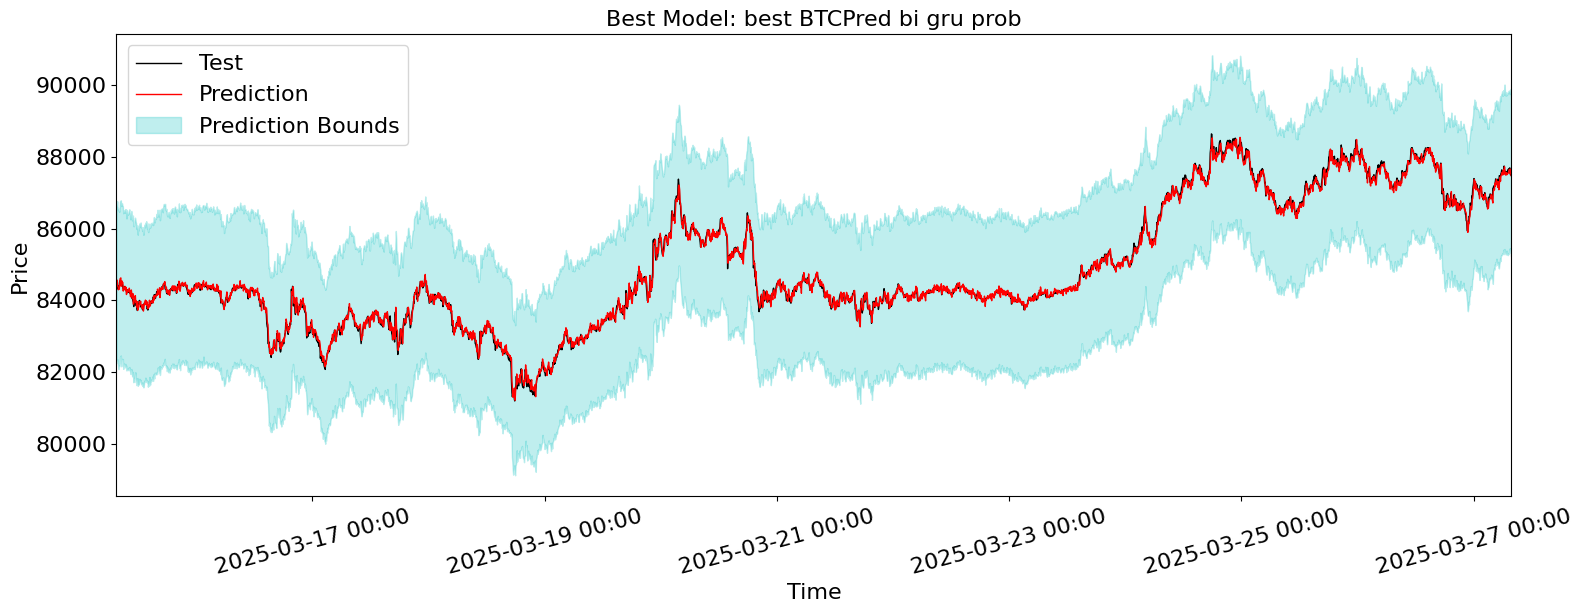

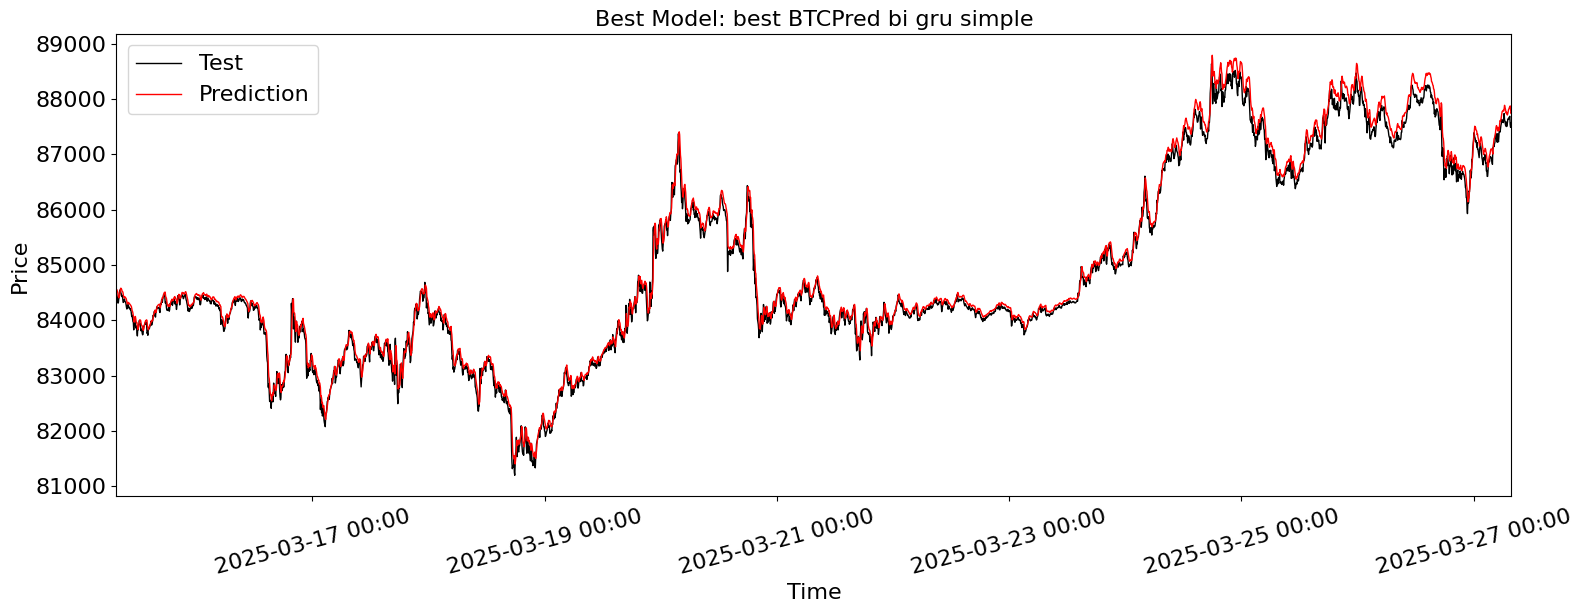

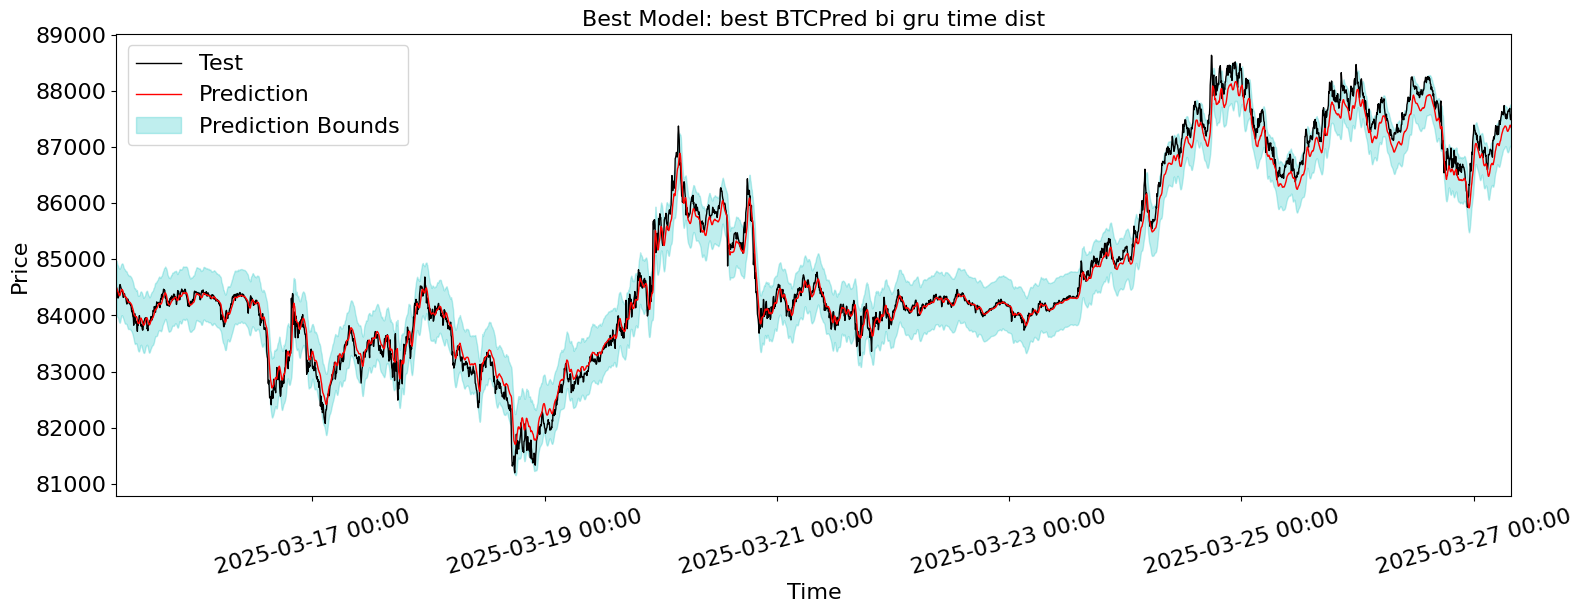

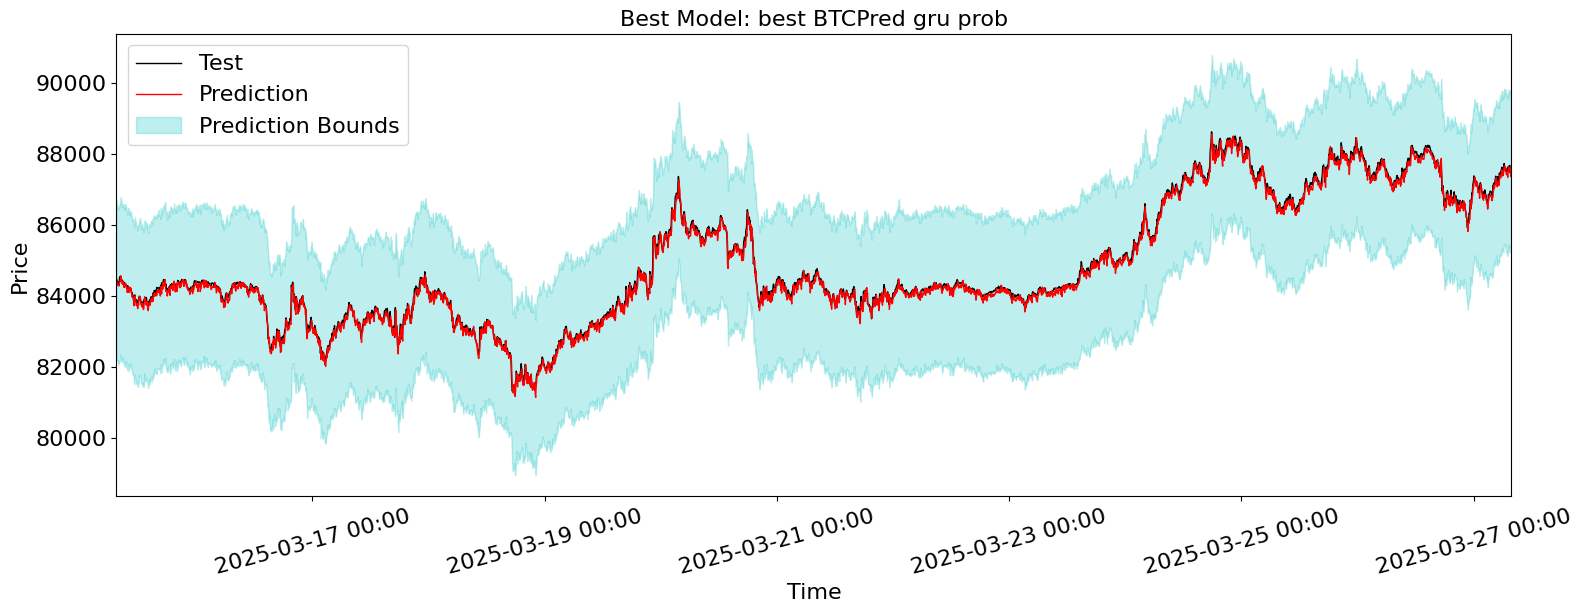

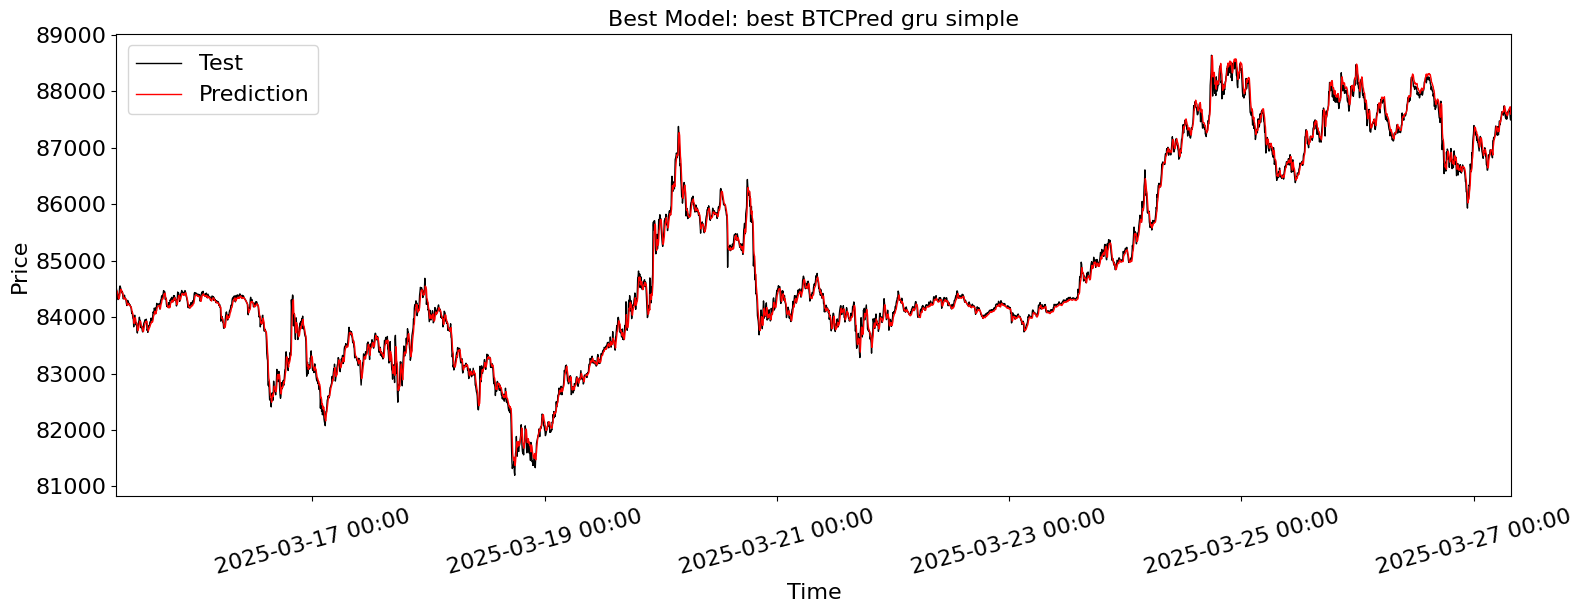

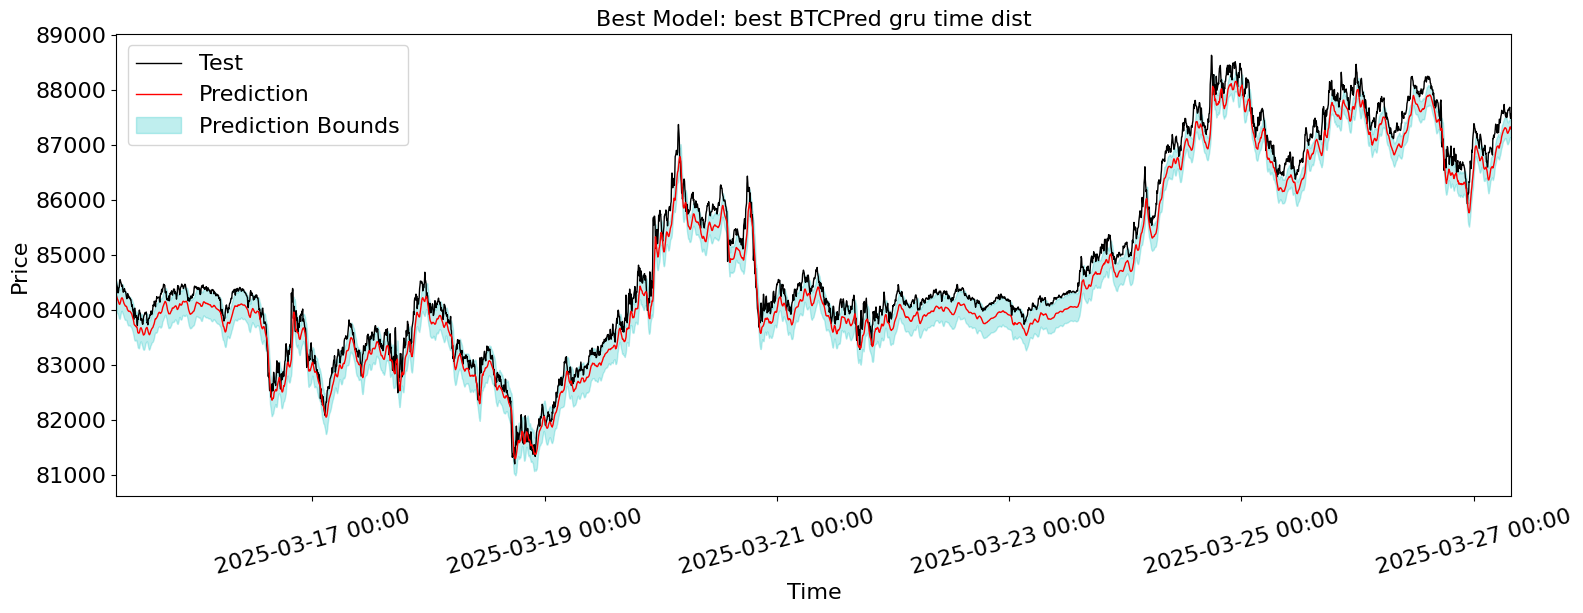

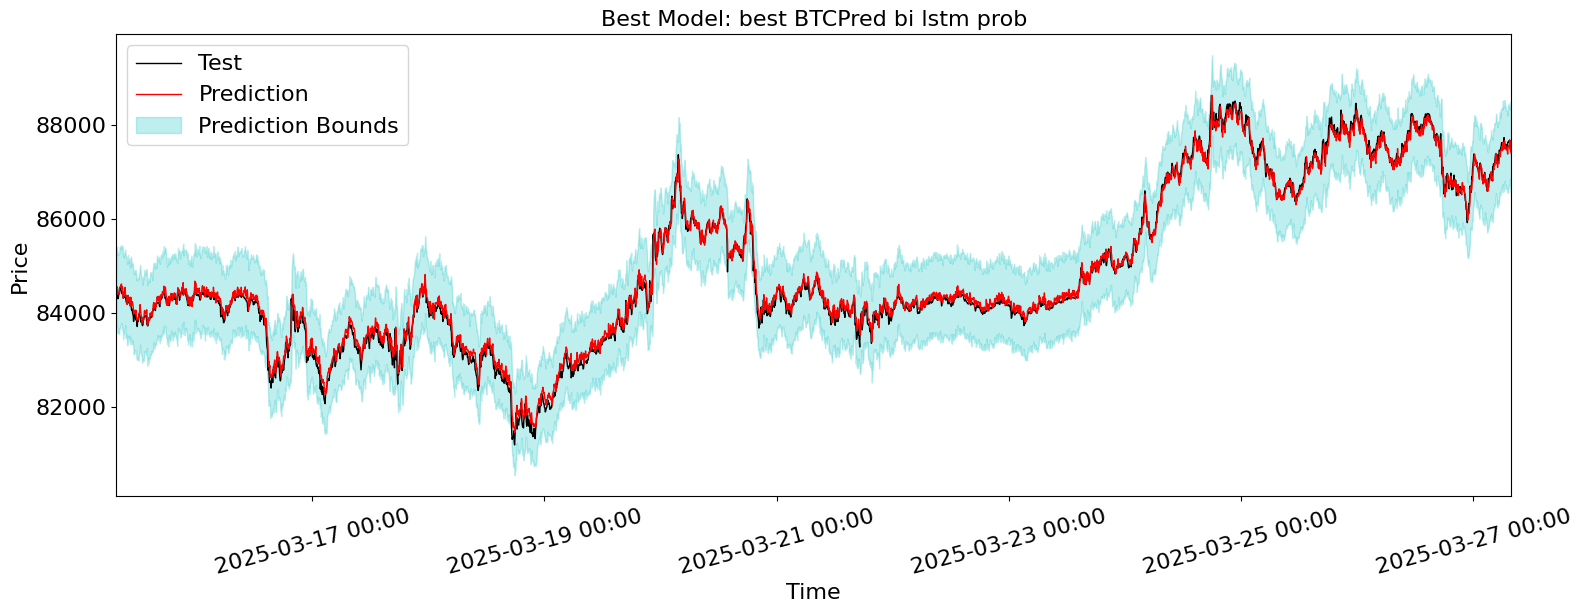

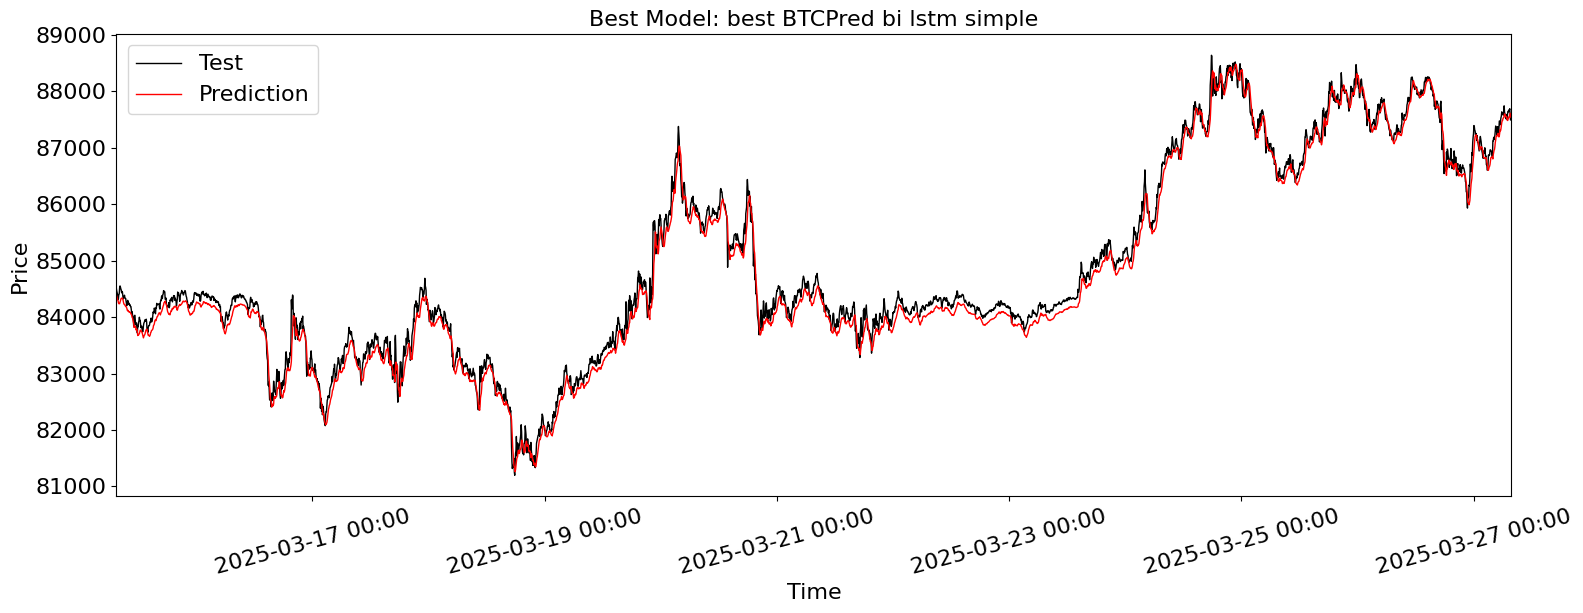

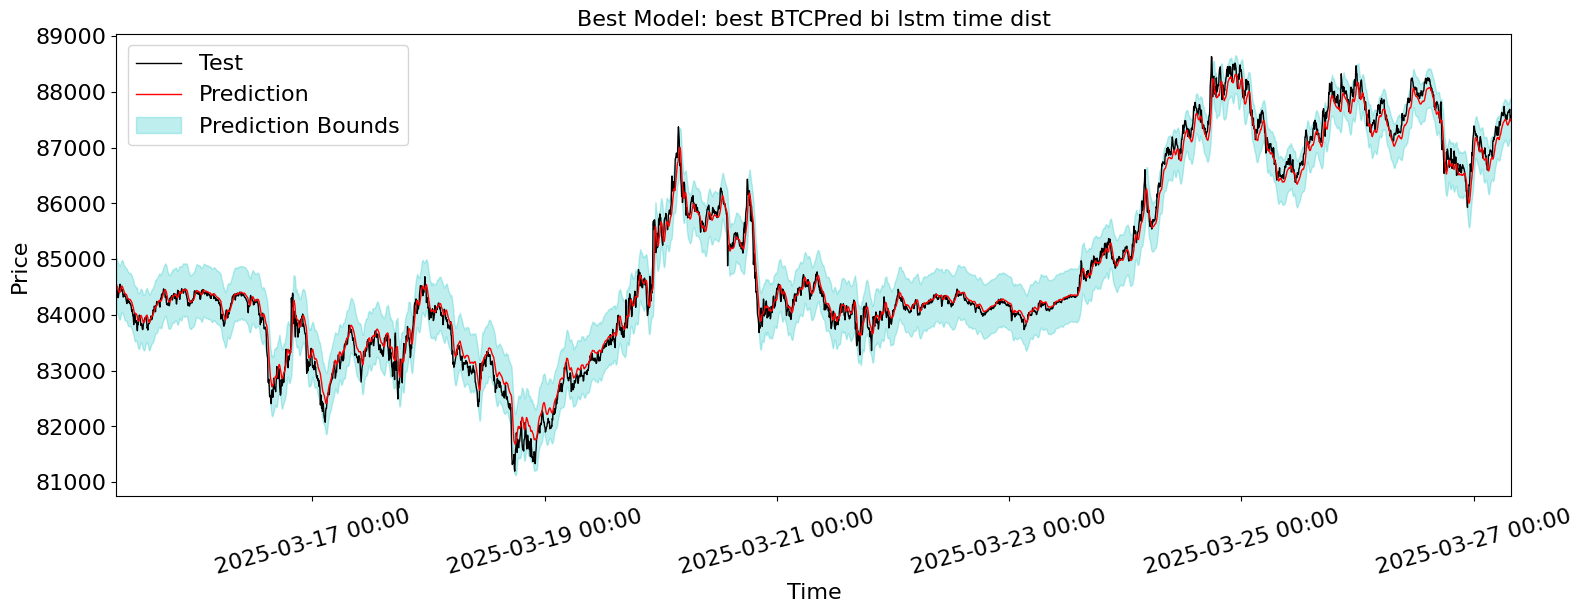

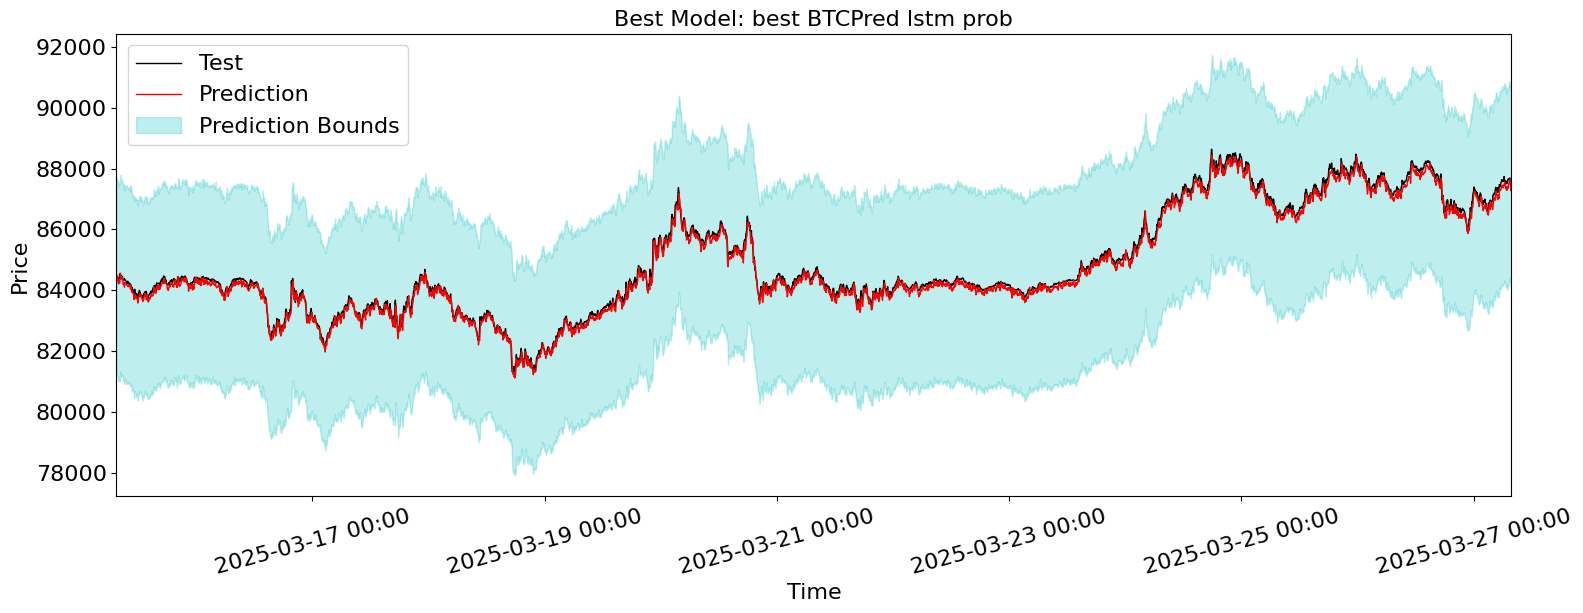

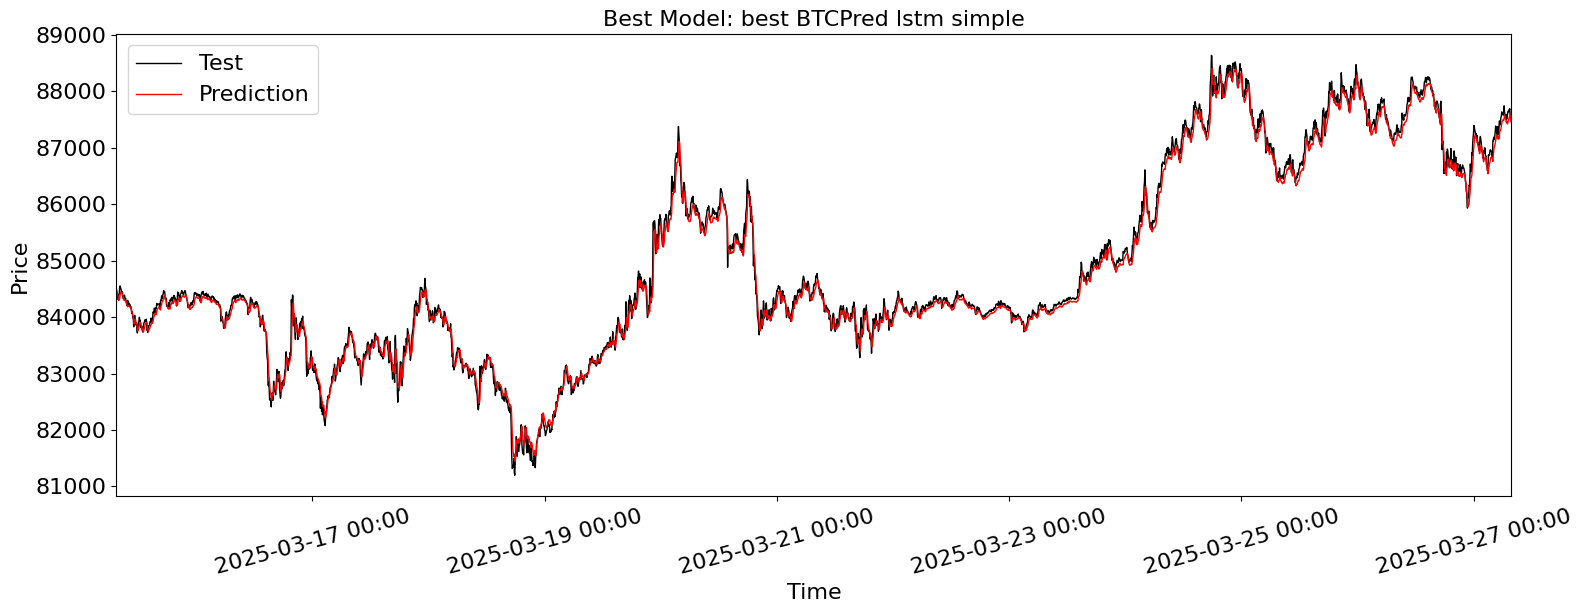

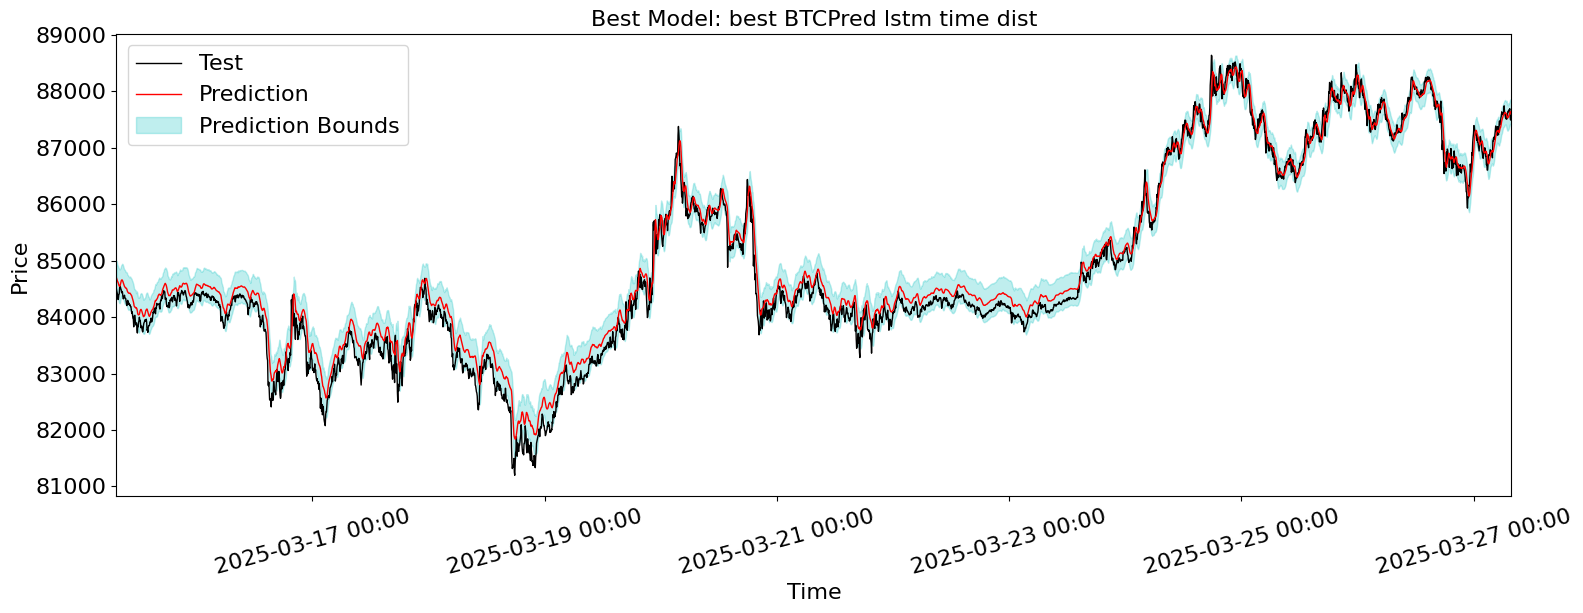

In [ ]:
"""
Description:
- Plots the prediction results for a specific model, including the test set and predicted values.

Parameters:
- y_train (numpy.ndarray): True values for the training set.
- y_test (numpy.ndarray): True values for the test set.
- y_pred (numpy.ndarray): Predicted values for the test set.
- model_name (str): Name of the model for labeling the plot.
- whole_data (bool): If True, includes the entire dataset in the plot (default is False).

Returns:
- None
"""
for model_name in y_pred_best.keys():
    plot_prediction(y_train, y_test, y_pred_best[model_name], model_name = model_name.replace('_', ' '))

# Residuals vs. Predicted Values Visualization

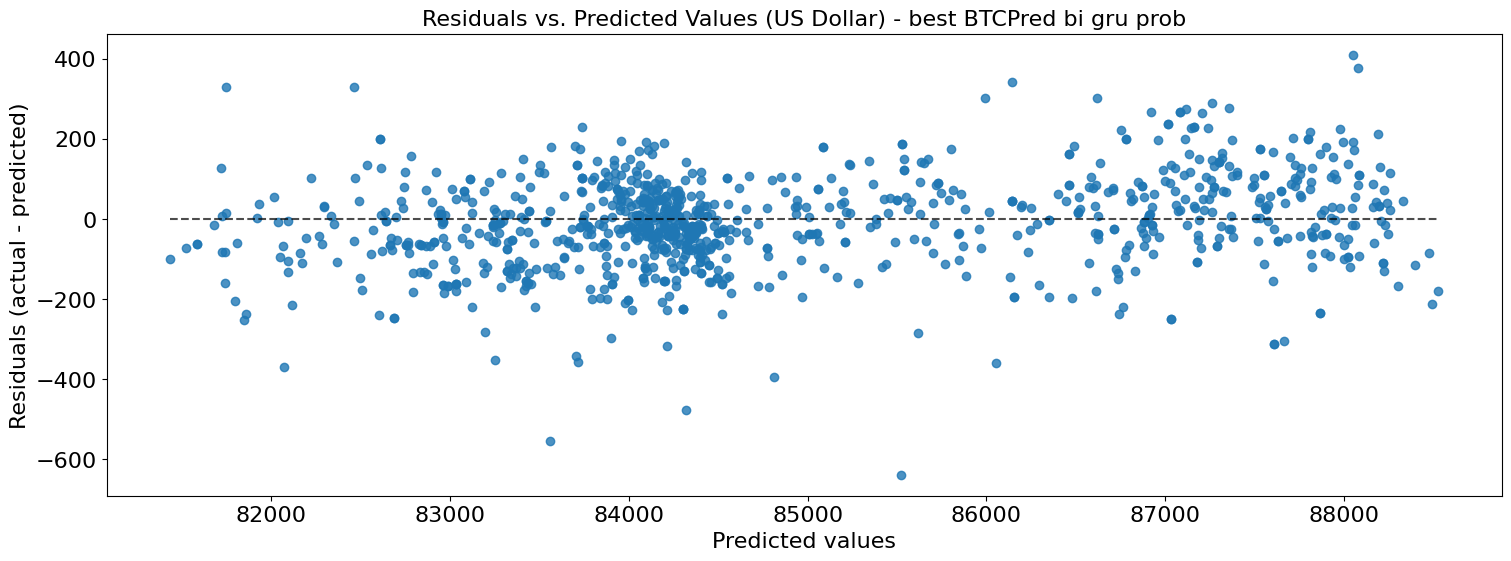

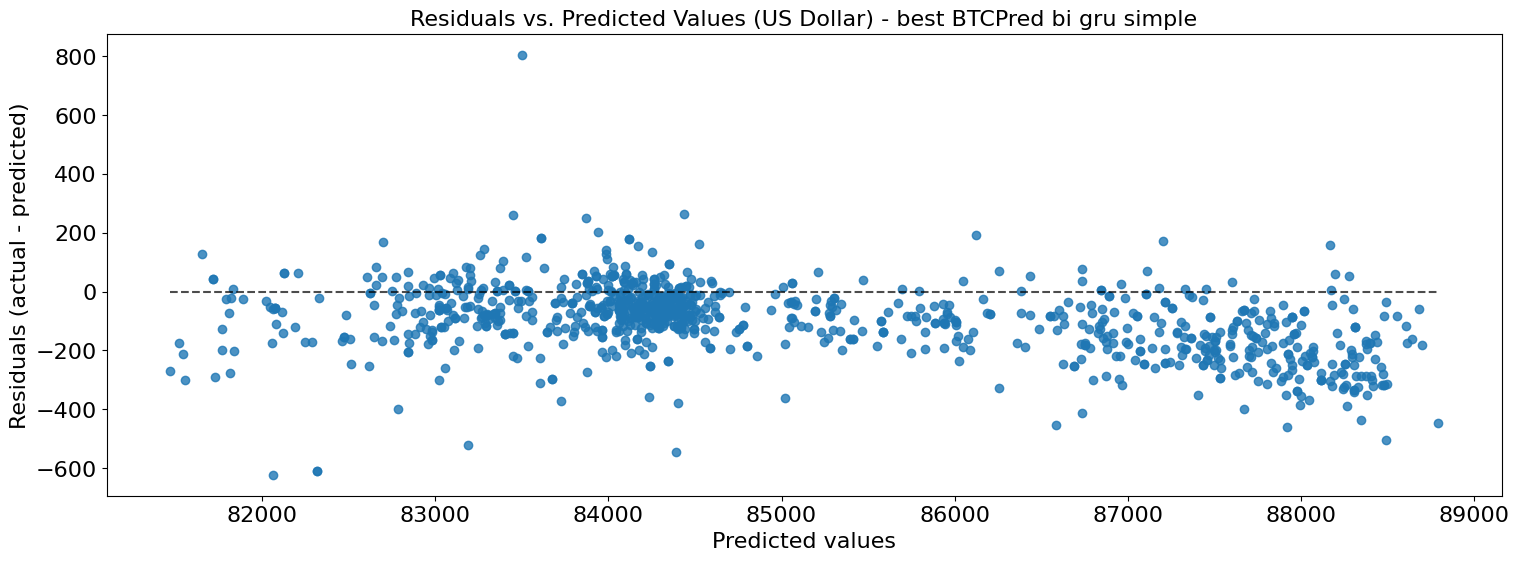

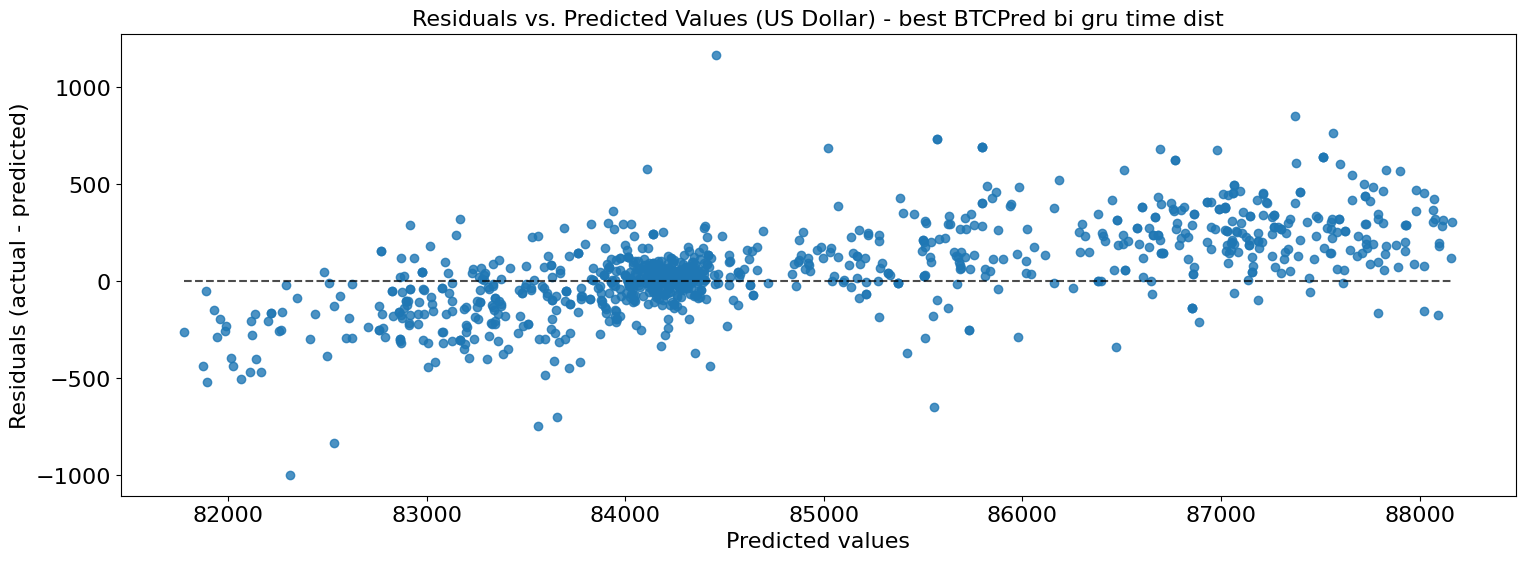

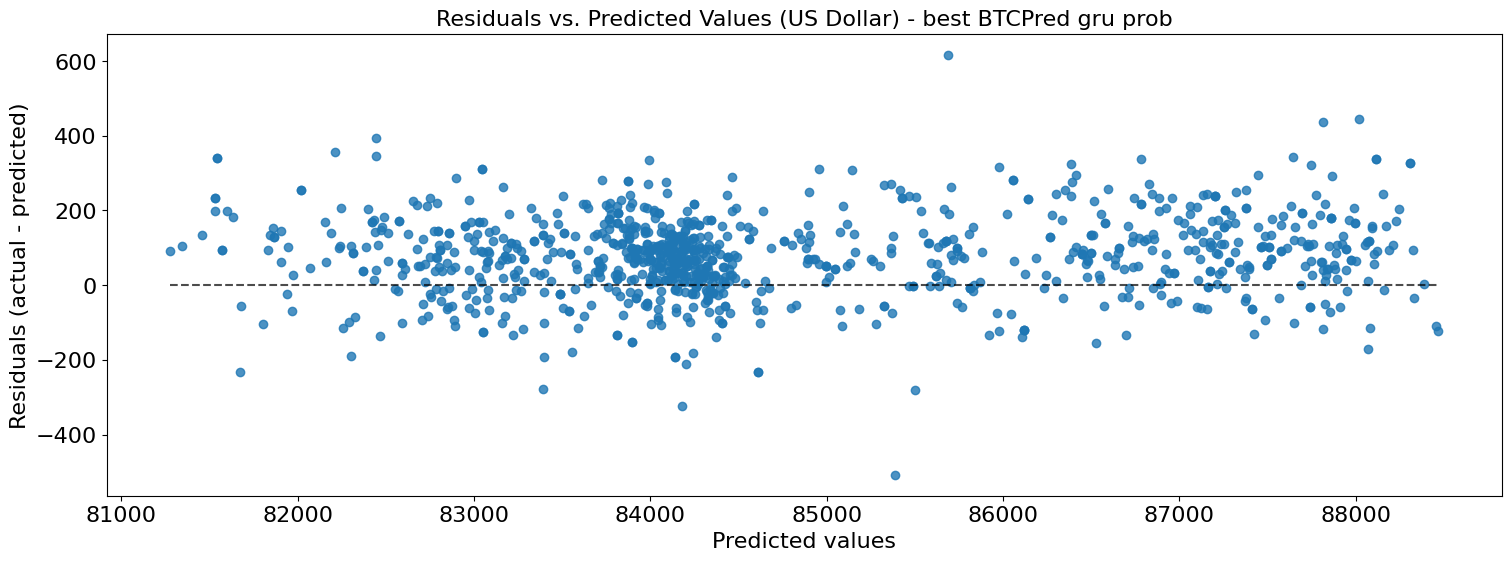

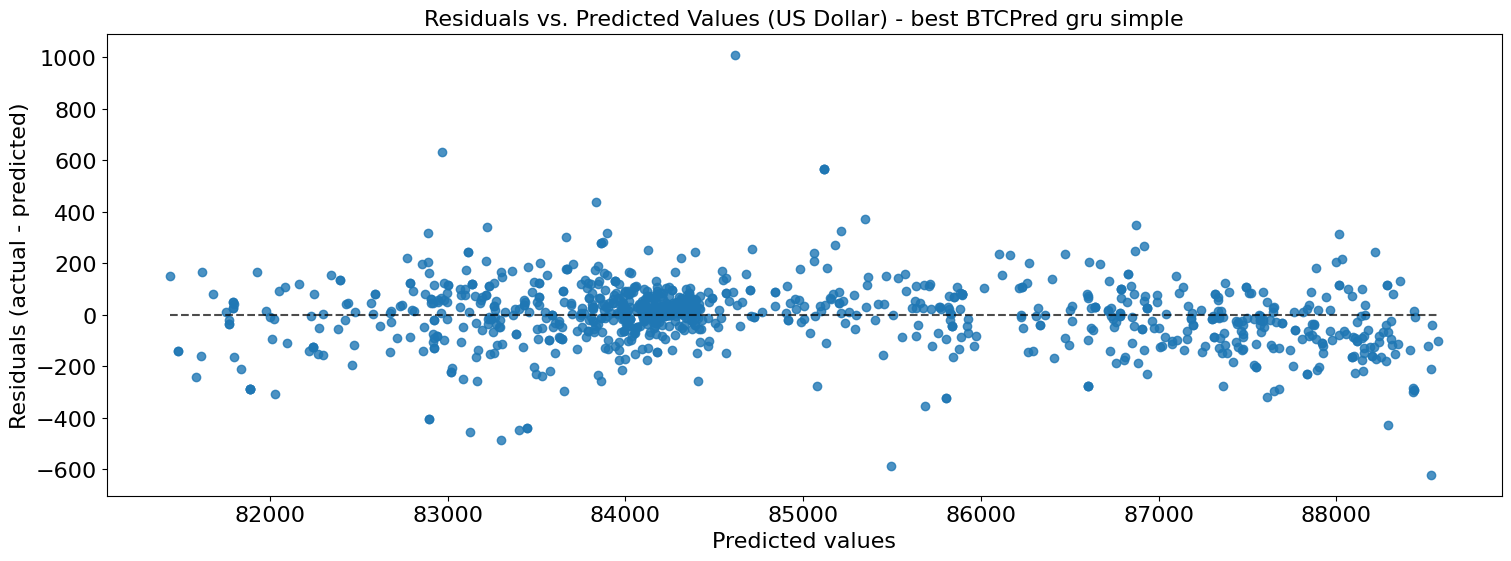

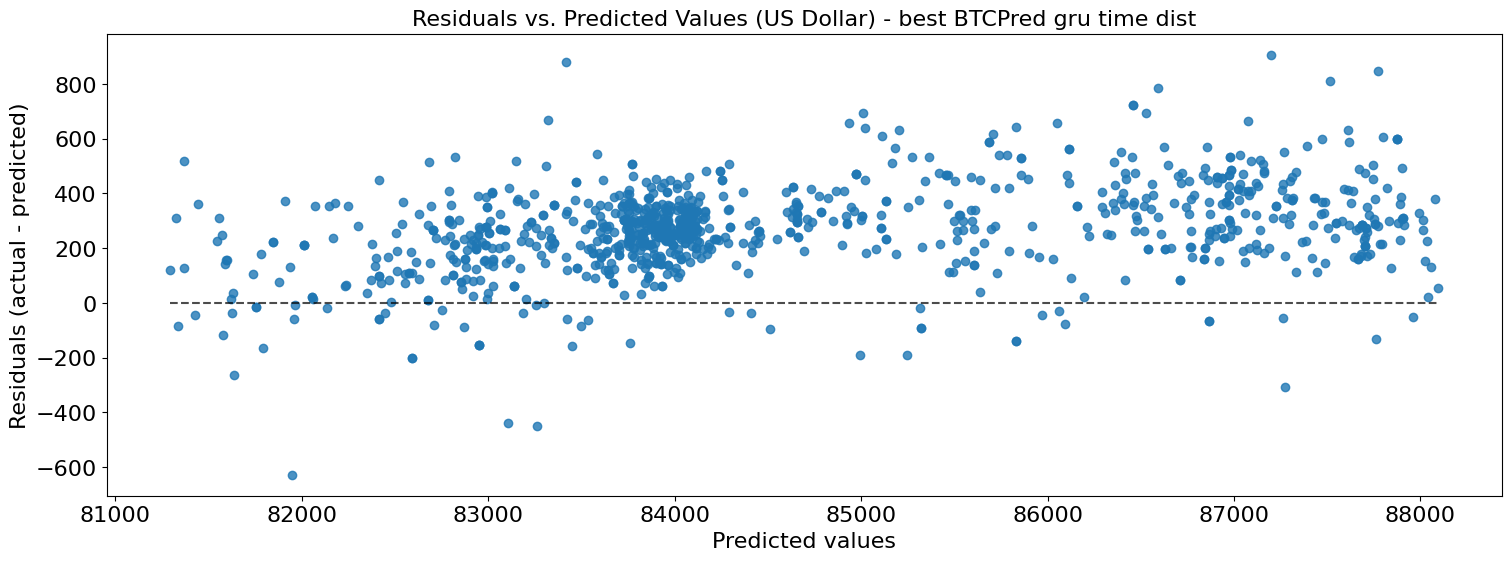

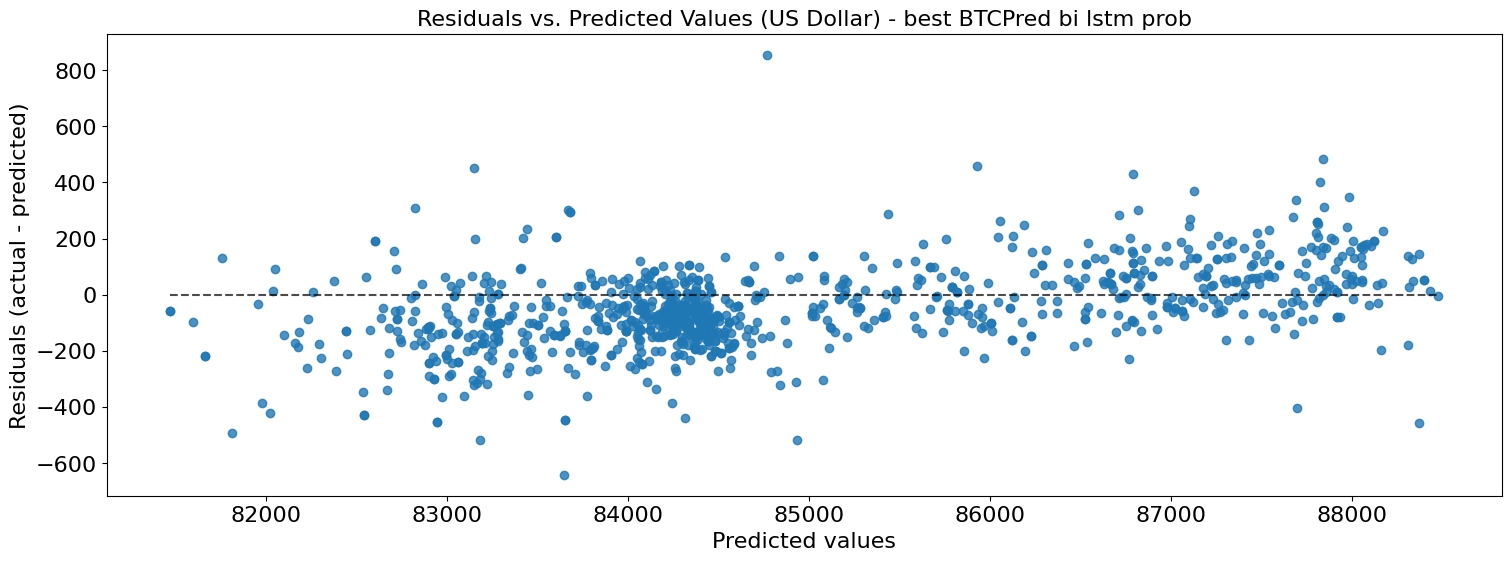

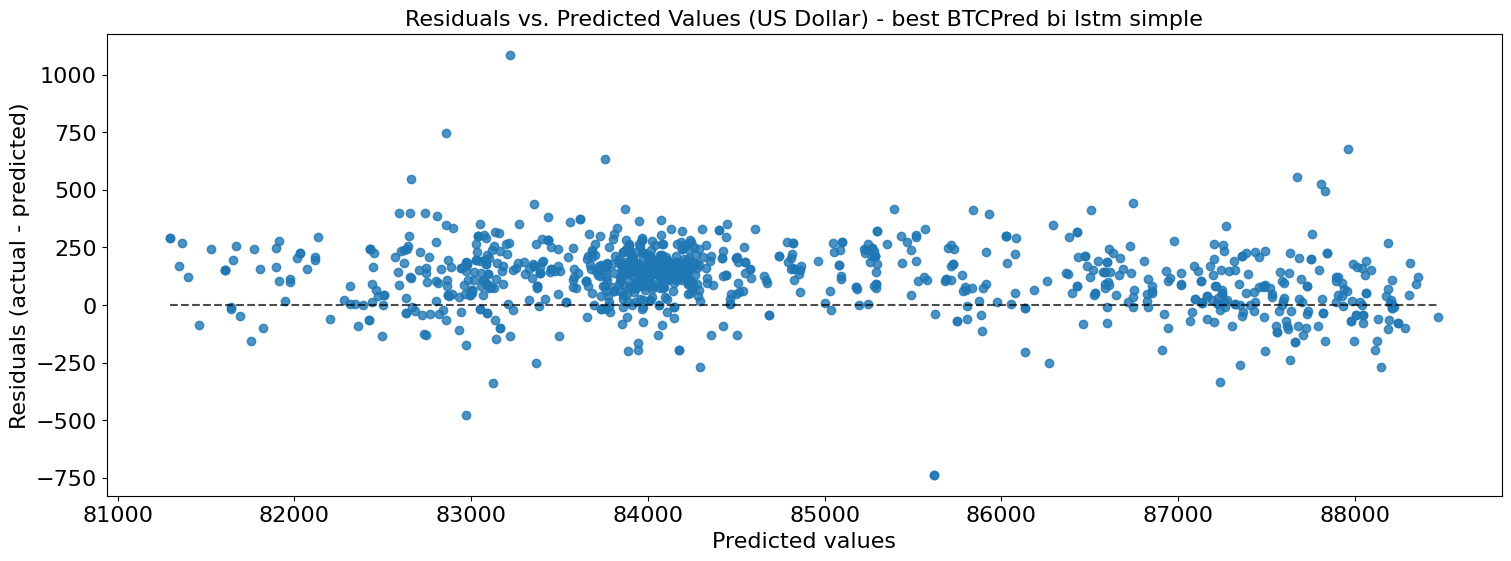

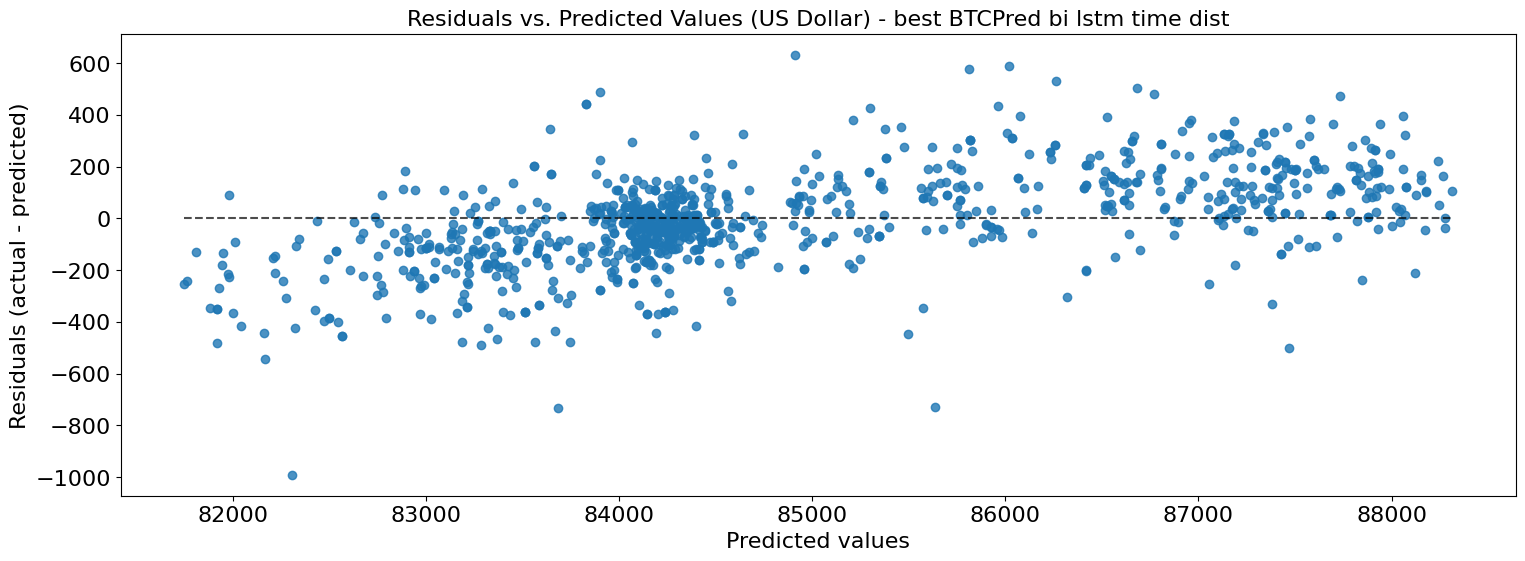

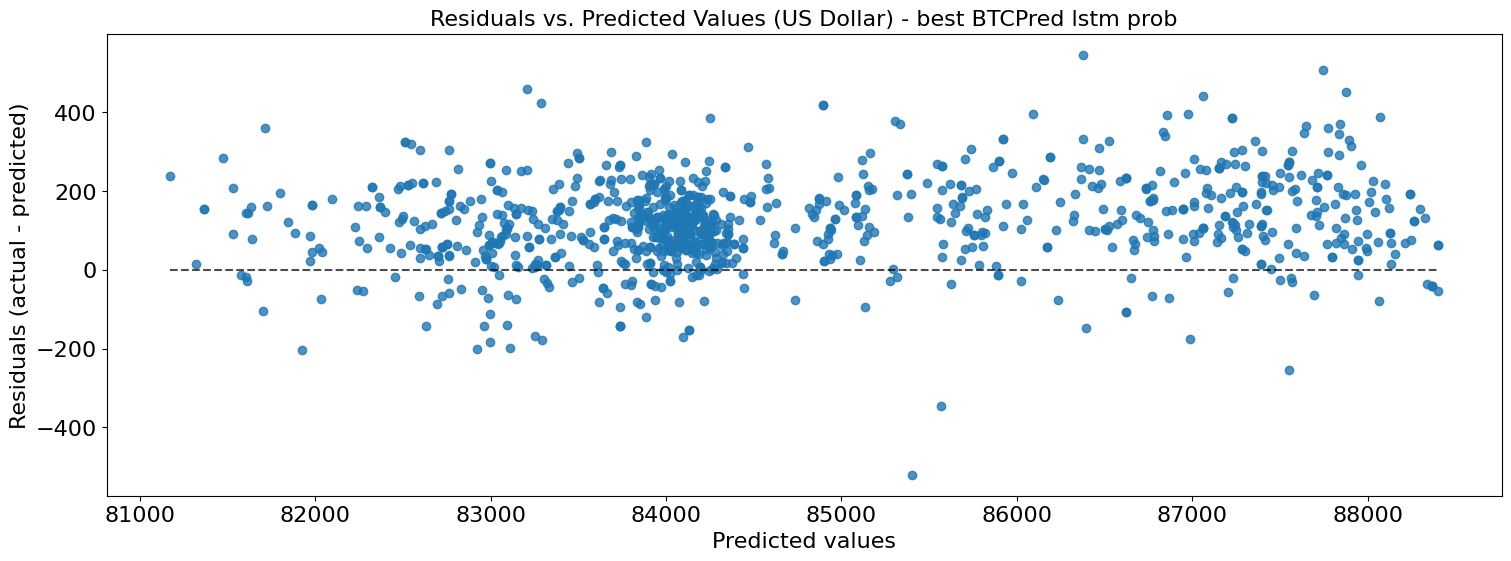

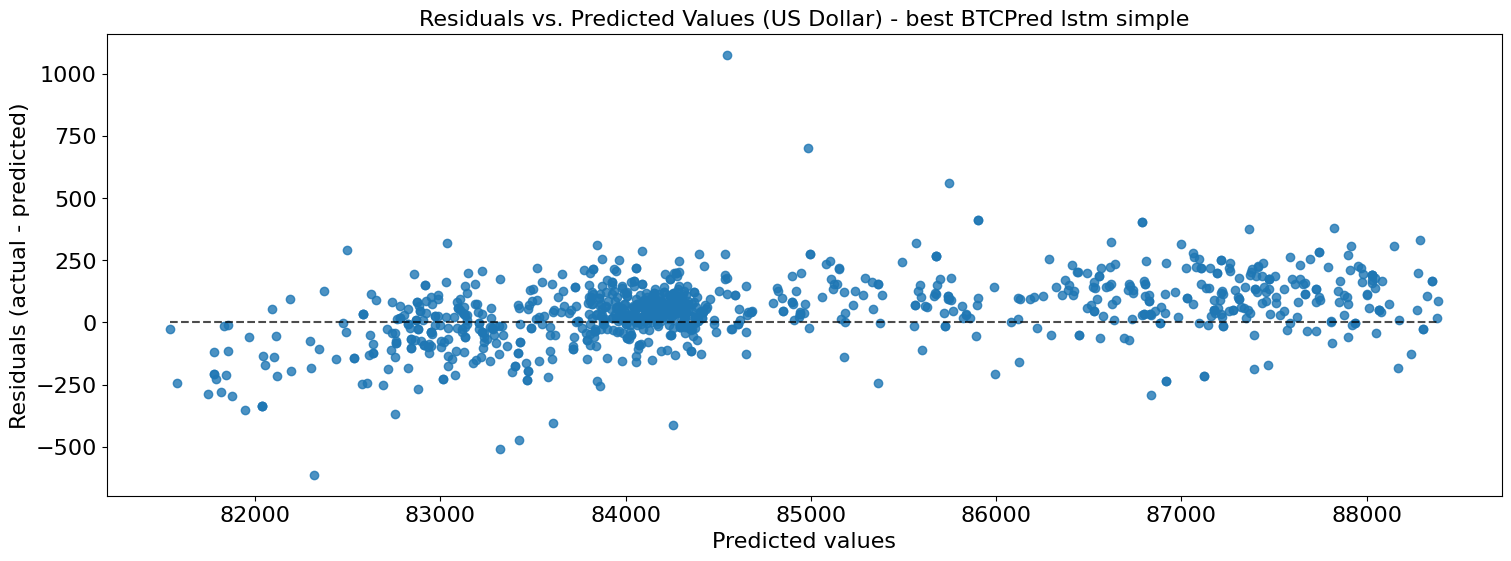

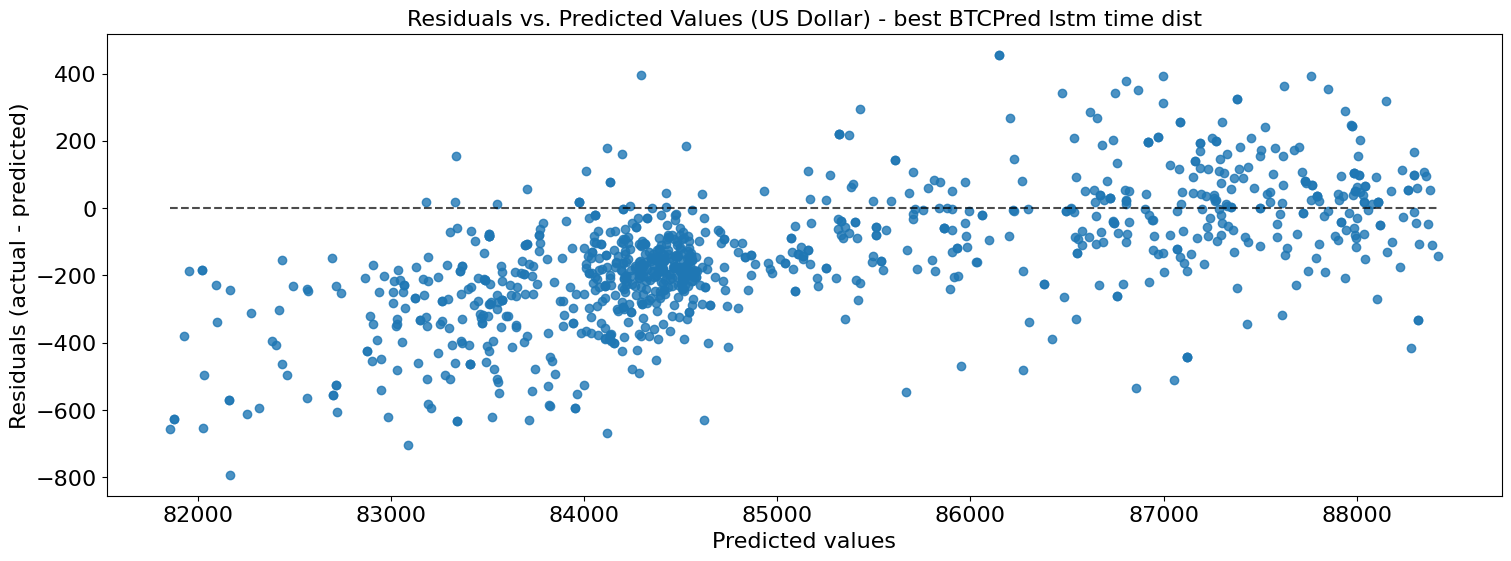

In [ ]:
"""
Description:
- Visualize the relationship between residuals and predicted values for each model.

Parameters:
- y_test (numpy.ndarray): True labels for the test set.
- y_pred_best (dict): Predictions from the best models.
- close_minmax (numpy.ndarray): Min-max values for denormalization.

Visualization:
- Residuals vs. Predicted Values plot displays the difference between true and predicted values against the predicted values.
- Each plot corresponds to a specific model, showcasing the model's performance in predicting price residuals.

Note: Residuals are the differences between the true and predicted values, providing insights into the model's accuracy.
"""
for model_name in y_pred_best.keys():
    PredictionErrorDisplay.from_predictions(y_true = denormalize(y_test, close_minmax),
                                            y_pred = denormalize(y_pred_best[model_name].mean(axis = 1), close_minmax)[:, np.newaxis])
    plt.title(f'Residuals vs. Predicted Values (US Dollar) - {model_name.replace("_", " ")}')
    plt.show()

# Models Evaluation Results

In [ ]:
df = pd.DataFrame.from_dict(models_test_result, orient = 'index')
df

r2_score  mean_absolute_percentage_error  \
best_BTCPred_bi_gru_prob        0.995261                        0.001031   
best_BTCPred_bi_gru_simple      0.991636                        0.001407   
best_BTCPred_bi_gru_time_dist   0.984081                        0.001885   
best_BTCPred_gru_prob           0.993622                        0.001276   
best_BTCPred_gru_simple         0.995603                        0.000953   
best_BTCPred_gru_time_dist      0.965971                        0.003324   
best_BTCPred_bi_lstm_prob       0.992961                        0.001313   
best_BTCPred_bi_lstm_simple     0.987834                        0.001837   
best_BTCPred_bi_lstm_time_dist  0.988490                        0.001591   
best_BTCPred_lstm_prob          0.990706                        0.001602   
best_BTCPred_lstm_simple        0.993666                        0.001204   
best_BTCPred_lstm_time_dist     0.980335                        0.002312   

                                explained_variance_score  \
best_BTCPred_bi_gru_prob                        0.995265   
best_BTCPred_bi_gru_simple                      0.994840   
best_BTCPred_bi_gru_time_dist                   0.985041   
best_BTCPred_gru_prob                           0.995701   
best_BTCPred_gru_simple                         0.995603   
best_BTCPred_gru_time_dist                      0.991177   
best_BTCPred_bi_lstm_prob                       0.993711   
best_BTCPred_bi_lstm_simple                     0.993117   
best_BTCPred_bi_lstm_time_dist                  0.988514   
best_BTCPred_lstm_prob                          0.995649   
best_BTCPred_lstm_simple                        0.994677   
best_BTCPred_lstm_time_dist                     0.987630   

                                mean_squared_log_error  mean_poisson_deviance  \
best_BTCPred_bi_gru_prob                      0.000002               0.164498   
best_BTCPred_bi_gru_simple                    0.000003               0.286658   
best_BTCPred_bi_gru_time_dist                 0.000006               0.548166   
best_BTCPred_gru_prob                         0.000003               0.220998   
best_BTCPred_gru_simple                       0.000002               0.152029   
best_BTCPred_gru_time_dist                    0.000014               1.177229   
best_BTCPred_bi_lstm_prob                     0.000003               0.245079   
best_BTCPred_bi_lstm_simple                   0.000005               0.423193   
best_BTCPred_bi_lstm_time_dist                0.000005               0.399392   
best_BTCPred_lstm_prob                        0.000004               0.321105   
best_BTCPred_lstm_simple                      0.000003               0.218940   
best_BTCPred_lstm_time_dist                   0.000008               0.688493   

                                  max_error  mean_absolute_error  \
best_BTCPred_bi_gru_prob         984.304688            87.559151   
best_BTCPred_bi_gru_simple       919.914062           120.104668   
best_BTCPred_bi_gru_time_dist   1168.039062           160.897430   
best_BTCPred_gru_prob           1008.546875           108.474007   
best_BTCPred_gru_simple         1010.718750            80.971588   
best_BTCPred_gru_time_dist      1413.718750           283.084045   
best_BTCPred_bi_lstm_prob        855.296875           111.183838   
best_BTCPred_bi_lstm_simple     1231.398438           155.753250   
best_BTCPred_bi_lstm_time_dist  1116.648438           135.130890   
best_BTCPred_lstm_prob           916.875000           136.388733   
best_BTCPred_lstm_simple        1076.179688           102.476143   
best_BTCPred_lstm_time_dist     1154.875000           194.818985   

                                root_mean_squared_error  
best_BTCPred_bi_gru_prob                     118.135849  
best_BTCPred_bi_gru_simple                   156.936249  
best_BTCPred_bi_gru_time_dist                216.511841  
best_BTCPred_gru_prob                        137.042587  
best_BTCPred_gru_simple          

# Use Our Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Swinburne/COS30018/ProbabilisticDL/featured_engineering/PriceGraph/data_has_ci_close/ci_Apple_20120101_to_20241212.csv')

In [ ]:
# show number of rows where the 'Date' falls between January 1st, 2024, and December 12th, 2024

# Convert the 'Date' column to datetime objects if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Filter the DataFrame
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-12-12')
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Display the filtered data
filtered_data

Date        Open        High         Low       Close     Volume  \
2768 2023-01-03  123.768448  129.537772  122.877812  128.924229  112117500   
2769 2023-01-04  125.045036  127.321104  123.778358  125.569520   89113600   
2770 2023-01-05  123.718971  126.440353  123.461682  125.807014   80962700   
2771 2023-01-06  128.271118  128.934144  123.590345  124.698692   87754700   
2772 2023-01-09  128.795593  132.021678  128.538304  129.112270   70790800   
...         ...         ...         ...         ...         ...        ...   
3252 2024-12-05  243.039993  244.539993  242.130005  243.990005   40033900   
3253 2024-12-06  242.839996  244.630005  242.080002  242.910004   36870600   
3254 2024-12-09  246.750000  247.240005  241.750000  241.830002   44649200   
3255 2024-12-10  247.770004  248.210007  245.339996  246.889999   36914800   
3256 2024-12-11  246.490005  250.800003  246.259995  247.960007   45205800   

        ci1    ci2    ci3    ci4  ...   ci11   ci12   ci13   ci14   ci15  \
2768   73.0  305.0  136.0  248.0  ...  300.0   41.0  300.0  261.0   68.0   
2769  248.0  136.0  248.0  192.0  ...   40.0  294.0  243.0   68.0  259.0   
2770   67.0  189.0  128.0  128.0  ...  252.0  189.0   68.0  217.0  190.0   
2771  132.0  132.0  132.0  168.0  ...  198.0   69.0  224.0  195.0  195.0   
2772   80.0   80.0  216.0  160.0  ...   82.0  264.0  245.0  245.0  252.0   
...     ...    ...    ...    ...  ...    ...    ...    ...    ...    ...   
3252    0.0   75.0  216.0  253.0  ...  360.0  105.0  396.0  176.0  368.0   
3253   70.0  216.0  264.0  405.0  ...  104.0  405.0  187.0  376.0  312.0   
3254  187.0  210.0  288.0  246.0  ...  312.0  140.0  280.0  240.0  264.0   
3255  180.0  220.0  144.0   72.0  ...  117.0  216.0  189.0  203.0  130.0   
3256  153.0   65.0   77.0   61.0  ...  165.0  150.0  156.0  108.0   99.0   

       ci16   ci17   ci18   ci19   ci20  
2768  273.0  230.0  230.0  238.0  238.0  
2769  220.0  220.0  224.0  256.0    0.0  
2770  190.0  182.0  216.0   60.0   60.0  
2771  189.0  220.0   62.0  120.0  134.0  
2772  209.0  142.0  204.0  216.0  288.0  
...     ...    ...    ...    ...    ...  
3252  312.0  342.0  204.0   84.0  222.0  
3253  351.0  216.0   84.0  333.0    0.0  
3254  165.0   78.0  198.0   24.0    0.0  
3255   96.0  176.0   24.0    2.0   24.0  
3256  213.0   24.0    4.0   33.0   14.0  

[489 rows x 26 columns]

In [ ]:
data.set_index('Date', inplace = True)

In [ ]:
data

Open        High         Low       Close     Volume    ci1  \
Date                                                                           
2012-01-03   12.388996   12.427257   12.321814   12.333865  302220800    NaN   
2012-01-04   12.455577   12.492935   12.330250   12.351941  260022000    NaN   
2012-01-05   12.593857   12.609522   12.432377   12.501067  271269600    NaN   
2012-01-06   12.725514   12.736059   12.629712   12.646281  318292800    NaN   
2012-01-09   12.705328   12.886691   12.693880   12.818906  394024400    NaN   
...                ...         ...         ...         ...        ...    ...   
2024-12-05  243.039993  244.539993  242.130005  243.990005   40033900    0.0   
2024-12-06  242.839996  244.630005  242.080002  242.910004   36870600   70.0   
2024-12-09  246.750000  247.240005  241.750000  241.830002   44649200  187.0   
2024-12-10  247.770004  248.210007  245.339996  246.889999   36914800  180.0   
2024-12-11  246.490005  250.800003  246.259995  247.960007   45205800  153.0   

              ci2    ci3    ci4    ci5  ...   ci11   ci12   ci13   ci14  \
Date                                    ...                               
2012-01-03    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-05    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-06    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-09    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...  ...    ...    ...    ...    ...   
2024-12-05   75.0  216.0  253.0  400.0  ...  360.0  105.0  396.0  176.0   
2024-12-06  216.0  264.0  405.0  368.0  ...  104.0  405.0  187.0  376.0   
2024-12-09  210.0  288.0  246.0   78.0  ...  312.0  140.0  280.0  240.0   
2024-12-10  220.0  144.0   72.0   79.0  ...  117.0  216.0  189.0  203.0   
2024-12-11   65.0   77.0   61.0  154.0  ...  165.0  150.0  156.0  108.0   

             ci15   ci16   ci17   ci18   ci19   ci20  
Date                                                  
2012-01-03    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-04    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-05    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-06    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-09    NaN    NaN    NaN    NaN    NaN    NaN  
...           ...    ...    ...    ...    ...    ...  
2024-12-05  368.0  312.0  342.0  204.0   84.0  222.0  
2024-12-06  312.0  351.0  216.0   84.0  333.0    0.0  
2024-12-09  264.0  165.0   78.0  198.0   24.0    0.0  
2024-12-10  130.0   96.0  176.0   24.0    2.0   24.0  
2024-12-11   99.0  213.0   24.0    4.0   33.0   14.0  

[3257 rows x 25 columns]

In [ ]:
data.describe()

Open         High          Low        Close        Volume  \
count  3257.000000  3257.000000  3257.000000  3257.000000  3.257000e+03   
mean     75.863432    76.602603    75.049182    75.801610  1.817596e+08   
std      65.331184    65.943299    64.635419    65.257994  1.669057e+08   
min      11.939036    12.216319    11.773033    11.860774  2.404830e+07   
25%      23.255968    23.388381    22.990372    23.206711  8.009200e+07   
50%      41.622601    41.920226    41.204500    41.544644  1.217768e+08   
75%     138.728577   140.735865   136.484050   138.849839  2.175620e+08   
max     247.770004   250.800003   246.259995   247.960007  1.506120e+09   

               ci1          ci2          ci3          ci4          ci5  ...  \
count  3248.000000  3248.000000  3248.000000  3248.000000  3248.000000  ...   
mean     71.895012    94.090209   103.196736   109.328510   114.270320  ...   
std      90.135929    89.498883    87.738032    85.715314    83.522774  ...   
min       0.000000     1.000000     0.000000     0.000000     3.000000  ...   
25%       0.000000    24.000000    33.000000    40.000000    46.000000  ...   
50%      32.000000    60.000000    78.000000    88.000000    96.000000  ...   
75%     120.000000   146.250000   156.000000   160.000000   162.000000  ...   
max     512.000000   540.000000   585.000000   576.000000   496.000000  ...   

              ci11         ci12         ci13         ci14         ci15  \
count  3238.000000  3238.000000  3238.000000  3238.000000  3238.000000   
mean    126.253243   125.659666   124.307288   122.031501   118.649475   
std      76.840382    78.382062    79.294906    80.850814    81.729583   
min       5.000000     5.000000     5.000000     5.000000     4.000000   
25%      69.000000    68.000000    64.000000    60.000000    54.000000   
50%     114.000000   112.000000   110.000000   108.000000   104.000000   
75%     168.000000   168.000000   167.250000   165.000000   165.000000   
max     504.000000   544.000000   490.000000   516.000000   510.000000   

              ci16         ci17         ci18         ci19         ci20  
count  3238.000000  3238.000000  3238.000000  3238.000000  3238.000000  
mean    114.846510   109.907968   104.043237    94.853305    72.679741  
std      83.731968    85.673062    88.780013    90.691177    91.407656  
min       3.000000     2.000000     1.000000     1.000000     0.000000  
25%      48.000000    42.000000    32.000000    23.000000     0.000000  
50%      96.000000    90.000000    80.000000    64.000000    34.000000  
75%     162.000000   162.000000   156.000000   147.000000   121.000000  
max     468.000000   512.000000   552.000000   602.000000   546.000000  

[8 rows x 25 columns]

# Plot Our Stock Data

In [ ]:
# inverse the above conversion to date datatype step: data['Date'] = pd.to_datetime(data['Date'])

data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d')
data


Open        High         Low       Close     Volume    ci1  \
Date                                                                           
2012-01-03   12.388996   12.427257   12.321814   12.333865  302220800    NaN   
2012-01-04   12.455577   12.492935   12.330250   12.351941  260022000    NaN   
2012-01-05   12.593857   12.609522   12.432377   12.501067  271269600    NaN   
2012-01-06   12.725514   12.736059   12.629712   12.646281  318292800    NaN   
2012-01-09   12.705328   12.886691   12.693880   12.818906  394024400    NaN   
...                ...         ...         ...         ...        ...    ...   
2024-12-05  243.039993  244.539993  242.130005  243.990005   40033900    0.0   
2024-12-06  242.839996  244.630005  242.080002  242.910004   36870600   70.0   
2024-12-09  246.750000  247.240005  241.750000  241.830002   44649200  187.0   
2024-12-10  247.770004  248.210007  245.339996  246.889999   36914800  180.0   
2024-12-11  246.490005  250.800003  246.259995  247.960007   45205800  153.0   

              ci2    ci3    ci4    ci5  ...   ci11   ci12   ci13   ci14  \
Date                                    ...                               
2012-01-03    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-04    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-05    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-06    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
2012-01-09    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...  ...    ...    ...    ...    ...   
2024-12-05   75.0  216.0  253.0  400.0  ...  360.0  105.0  396.0  176.0   
2024-12-06  216.0  264.0  405.0  368.0  ...  104.0  405.0  187.0  376.0   
2024-12-09  210.0  288.0  246.0   78.0  ...  312.0  140.0  280.0  240.0   
2024-12-10  220.0  144.0   72.0   79.0  ...  117.0  216.0  189.0  203.0   
2024-12-11   65.0   77.0   61.0  154.0  ...  165.0  150.0  156.0  108.0   

             ci15   ci16   ci17   ci18   ci19   ci20  
Date                                                  
2012-01-03    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-04    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-05    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-06    NaN    NaN    NaN    NaN    NaN    NaN  
2012-01-09    NaN    NaN    NaN    NaN    NaN    NaN  
...           ...    ...    ...    ...    ...    ...  
2024-12-05  368.0  312.0  342.0  204.0   84.0  222.0  
2024-12-06  312.0  351.0  216.0   84.0  333.0    0.0  
2024-12-09  264.0  165.0   78.0  198.0   24.0    0.0  
2024-12-10  130.0   96.0  176.0   24.0    2.0   24.0  
2024-12-11   99.0  213.0   24.0    4.0   33.0   14.0  

[3257 rows x 25 columns]

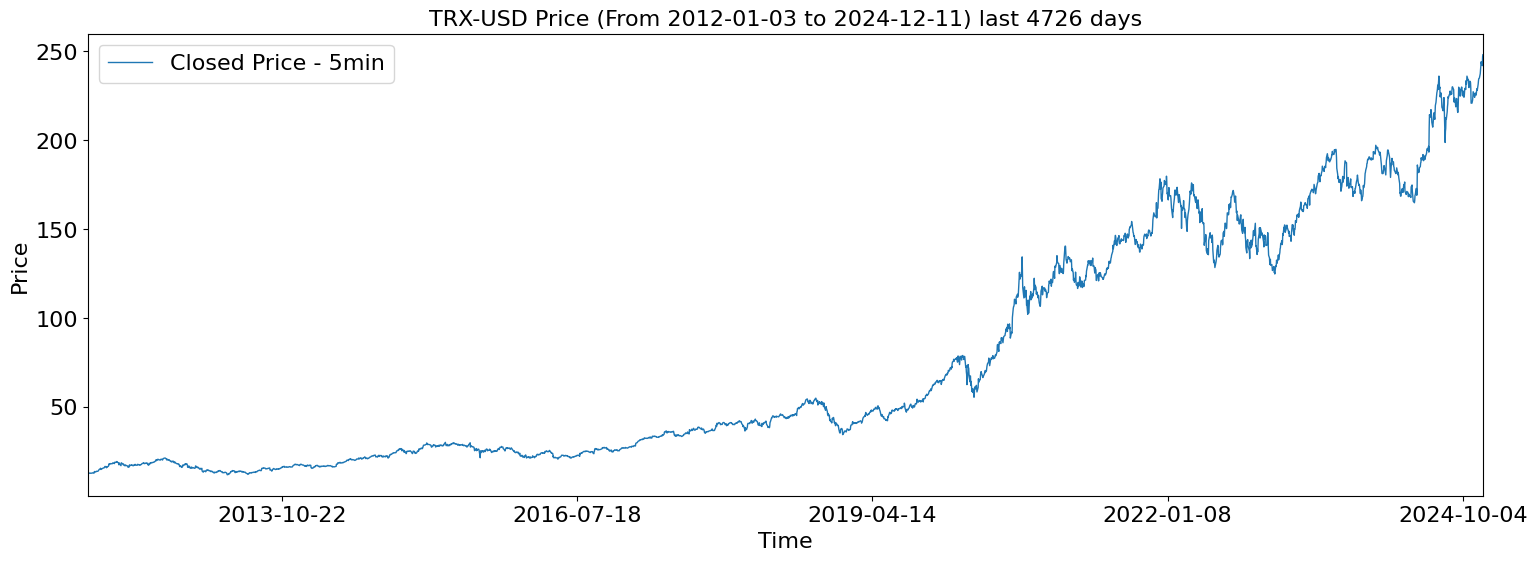

In [ ]:
"""
Description:
- Plots the historical closed price of a cryptocurrency.
- The x-axis is formatted with a custom date formatter.

Parameters:
- data (pd.DataFrame): Historical price data with timestamps and closed prices.
- dateformat (str): Custom date format for timestamp display.
"""

import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime

dateformat = '%Y-%m-%d'

dates = [mdate.date2num(datetime.fromtimestamp(datetime.strptime(d, dateformat).timestamp())) for d in data.index]

plt.gca().xaxis.set_major_formatter(mdate.DateFormatter(dateformat))
plt.plot(dates, list(data['Close']), label = 'Closed Price - 5min', linewidth = 1)
plt.xlim([dates[0], dates[-1]])
plt.title('TRX-USD Price (From {} to {}) last {} days'
.format(data.index[0], data.index[-1], (datetime.strptime(data.index[-1], dateformat) - datetime.strptime(data.index[0], dateformat)).days))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model Training Configuration

In [ ]:
"""
Description:
- Configuration settings for training the time series prediction models.

Parameters:
- test_split_percentage (float): Percentage of data reserved for testing.
- validation_split_percentage (float): Percentage of training data used for validation.
- epochs (int): Number of training epochs.
- batch_size (int): Batch size for training.
- verbose (int): Verbosity level during training (0 for silent).
- analysis_duration (int): Duration of the sequence used for prediction.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
# test_split_percentage = .8
test_split_percentage = round(1 - len(filtered_data) / len(data), 3)
validation_split_percentage = .2
epochs = 50
batch_size = 32
verbose = 0
analysis_duration = 6
price_pairs = 'TRXUSD'

In [ ]:
print(test_split_percentage)

0.85


# Price Preprocessing and Normalization Parameters

In [ ]:
"""
Parameters for normalizing cryptocurrency closing prices:
- alpha (float): Scaling factor for the minimum value.
- beta (float): Scaling factor for the maximum value.
- close_price (numpy.ndarray): NumPy array containing closing prices.
- data_len (int): Total length of the price data.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
"""
alpha, beta = .8, 1.2
close_price = pd.Series.to_numpy(data['Close'])
data_len = close_price.shape[0]
train_len = int((test_split_percentage * data_len) // analysis_duration * analysis_duration)
test_len = int(data_len - train_len)
close_minmax = np.array([alpha * close_price.min(), beta * close_price.max()], dtype = 'float32')

# Price Normalization and Save

In [ ]:
"""
Description:
- Normalize the closing prices of cryptocurrency data and save the min-max normalization range.

Parameters:
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- data_len (int): Total length of the price data.
- close_minmax (numpy.ndarray): Min-max normalization range for closing prices.
- price_pairs (str): Symbol pairs for the cryptocurrency prices dataset.
"""
close_price = close_price.reshape((data_len, 1)).astype('float32')
close_price = normalize(close_price, close_minmax)
np.save(f'close_minmax_{price_pairs.lower()}.npy', close_minmax)

In [ ]:
# Normalize other columns

# Dictionary to store min-max values for each column
minmax_dict = {}

# Normalize all numerical columns except "Close"
for col in data.select_dtypes(include=[np.number]).columns:
    if col != "Close":  # Skip the "Close" column
        min_val = data[col].min()
        max_val = data[col].max()
        minmax_dict[col] = np.array([min_val, max_val])  # Store min-max values

        data[col] = normalize(data[col].values, minmax_dict[col])  # Normalize column

# Save min-max values for future denormalization
np.save("minmax_values.npy", minmax_dict)

# Save the normalized dataset
data.to_csv("normalized_data.csv", index=False)

In [ ]:
data

Open      High       Low       Close    Volume       ci1  \
Date                                                                       
2012-01-03  0.001908  0.000884  0.002340   12.333865  0.187692       NaN   
2012-01-04  0.002190  0.001159  0.002376   12.351941  0.159219       NaN   
2012-01-05  0.002777  0.001648  0.002812   12.501067  0.166808       NaN   
2012-01-06  0.003335  0.002178  0.003653   12.646281  0.198536       NaN   
2012-01-09  0.003249  0.002810  0.003927   12.818906  0.249634       NaN   
...              ...       ...       ...         ...       ...       ...   
2024-12-05  0.979943  0.973762  0.982387  243.990005  0.010786  0.000000   
2024-12-06  0.979095  0.974139  0.982174  242.910004  0.008652  0.136719   
2024-12-09  0.995675  0.985079  0.980767  241.830002  0.013900  0.365234   
2024-12-10  1.000000  0.989144  0.996077  246.889999  0.008681  0.351562   
2024-12-11  0.994572  1.000000  1.000000  247.960007  0.014276  0.298828   

                 ci2       ci3       ci4       ci5  ...      ci11      ci12  \
Date                                                ...                       
2012-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-05       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-06       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-09       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2024-12-05  0.137291  0.369231  0.439236  0.805274  ...  0.711423  0.185529   
2024-12-06  0.398887  0.451282  0.703125  0.740365  ...  0.198397  0.742115   
2024-12-09  0.387755  0.492308  0.427083  0.152130  ...  0.615230  0.250464   
2024-12-10  0.406308  0.246154  0.125000  0.154158  ...  0.224449  0.391466   
2024-12-11  0.118738  0.131624  0.105903  0.306288  ...  0.320641  0.269017   

                ci13      ci14      ci15      ci16      ci17      ci18  \
Date                                                                     
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-09       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2024-12-05  0.806186  0.334638  0.719368  0.664516  0.666667  0.368421   
2024-12-06  0.375258  0.726027  0.608696  0.748387  0.419608  0.150635   
2024-12-09  0.567010  0.459883  0.513834  0.348387  0.149020  0.357532   
2024-12-10  0.379381  0.387476  0.249012  0.200000  0.341176  0.041742   
2024-12-11  0.311340  0.201566  0.187747  0.451613  0.043137  0.005445   

                ci19      ci20  
Date                            
2012-01-03       NaN       NaN  
2012-01-04       NaN       NaN  
2012-01-05       NaN       NaN  
2012-01-06       NaN       NaN  
2012-01-09       NaN       NaN  
...              ...       ...  
2024-12-05  0.138103  0.406593  
2024-12-06  0.552413  0.000000  
2024-12-09  0.038270  0.000000  
2024-12-10  0.001664  0.043956  
2024-12-11  0.053245  0.025641  

[3257 rows x 25 columns]

# Data Splitting for Training and Validation

In [ ]:
"""
Description:
- Split the time series data into training, testing, and validation sets for model training.

Parameters:
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and testing data split.
- X_val, y_val (numpy.ndarray): Validation data split from the training set.
- close_price (numpy.ndarray): Reshaped and normalized closing prices.
- train_len (int): Length of the training data.
- test_len (int): Length of the testing data.
- validation_split_percentage (float): Percentage of training data used for validation.
- analyzing_duration (int): Duration of the sequence used for prediction.
"""
X_train, y_train, X_test, y_test = split_data(close_price = close_price, training_len = train_len, testing_len = test_len, analyzing_duration = analysis_duration)
X_val, y_val = X_train[int(train_len - (validation_split_percentage * train_len)):], y_train[int(train_len - (validation_split_percentage * train_len)):]
X_train, y_train = X_train[:int(train_len - (validation_split_percentage * train_len))], y_train[:int(train_len - (validation_split_percentage * train_len))]

# Transfer Learning with Probabilistic GRU Model (train on TRX price data)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_poisson_deviance as mpd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse

"""
Description:
- Performs transfer learning by loading a pre-trained Probabilistic GRU model.
- Transfer learning is a machine learning technique where knowledge gained from one model (source model) is applied to another related model (target model).
- In this code, transfer learning is implemented for time series forecasting using a pre-trained Probabilistic GRU model.
- The source model, 'best_BTCPred_gru_prob,' is trained on Bitcoin price data.
- The target model, 'best_TRXPred_gru_prob,' is trained on Tron price data using the weights transferred from the source model.
- This approach leverages the learned patterns and features from the Bitcoin data to enhance the training of the Tron model.
- The transfer_model() function loads the pre-trained model, freezes the layers up to the output layer, and compiles it for training.
- The model is then trained on Tron data, and the performance is evaluated and recorded in transfer_model_test_result.
- Various metrics such as R2 score, mean absolute percentage error, explained variance score, etc., are used to assess the model's performance.


Parameters:
- K.clear_session(): Clears the Keras session to release resources.
- m_name_ (str): Model name for identification.
- transfer_model_test_result (dict): Dictionary to store evaluation results.
- model (tf.keras.Model): Transfer learning model loaded from a pre-trained model.
- out_path_best (str): Path to store the best model during training.
- X_train, y_train, X_test, y_test (numpy.ndarray): Training and test data.
- epochs, batch_size, verbose (int): Training parameters.
- close_minmax (numpy.ndarray): Min-max values for denormalization.

Returns:
- None: The transfer learning model is trained, evaluated, and results are recorded in transfer_model_test_result.
"""
K.clear_session()
m_name_ = 'best_TRXPred_gru_prob'
transfer_model_test_result = {}
transfer_model_test_result.update({f'{m_name_}': {}})
model = transfer_model()
model.summary(line_length = 140)

tbcall = TrainingCallback(model_dir = out_path_best,
                          valid_data = (X_val, y_val),
                          model = model, model_name = m_name_)

model_history = model.fit(X_train, y_train,
                          epochs = epochs, batch_size = batch_size, callbacks = tbcall, verbose = verbose)

model.save(f'{out_path}/{m_name_.replace("best", "fulltrained")}.keras')
best_model = load_model(f'{out_path_best}/{m_name_}.keras', safe_mode = False)

test_p = model.predict(X_test)
test_p_best = best_model.predict(X_test)
y_pred_best.update({f'{m_name_}': test_p_best})

transfer_model_test_result[f'{m_name_}'].update({'r2_score': float(r2_score(denormalize(y_test, close_minmax),
                                                                            denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_absolute_percentage_error': float(mape(denormalize(y_test, close_minmax),
                                                                                          denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'explained_variance_score': float(evs(denormalize(y_test, close_minmax),
                                                                                       denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_squared_log_error': float(msle(denormalize(y_test, close_minmax),
                                                                                      denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_poisson_deviance': float(mpd(denormalize(y_test, close_minmax),
                                                                                    denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'max_error': float(max_error(denormalize(y_test, close_minmax),
                                                                              denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'mean_absolute_error': float(mae(denormalize(y_test, close_minmax),
                                                                                  denormalize(test_p_best.mean(axis = 1), close_minmax)))})
transfer_model_test_result[f'{m_name_}'].update({'root_mean_squared_error': float(rmse(denormalize(y_test, close_minmax),
                                                                                       denormalize(test_p_best.mean(axis = 1), close_minmax)))})

Model: "best_TRXPred_gru_prob"
____________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              
 close_price (InputLayer)                                      [(None, 6, 1)]                                          0                    
                                                                                                                                            
 gru (GRU)                                                     (None, 256)                                             198912               
                                                                                                                                            
 batch_normalization (BatchNormalization)                      (None, 256)                                             1024

Training started. Checking the best model based on the highest R2-score is On
18/18 [==============================] - 1s 4ms/step


Epoch: 01/50 | 0:00:03 | Price R2 score: 0.0354 | loss: 1652.2087 | Model Weights Changed And Best Model Saved
18/18 [==============================] - 0s 4ms/step
Epoch: 02/50 | 0:00:00 | Price R2 score: -7.8523 | loss: 1154.7881 | Model Weights Not Changed
18/18 [==============================] - 0s 4ms/step
Epoch: 03/50 | 0:00:00 | Price R2 score: 0.9689 | loss: 783.1358 | Model Weights Changed And Best Model Saved
18/18 [==============================] - 0s 5ms/step
Epoch: 04/50 | 0:00:00 | Price R2 score: -1.7933 | loss: 510.6027 | Model Weights Not Changed
18/18 [==============================] - 0s 4ms/step
Epoch: 05/50 | 0:00:00 | Price R2 score: -2.4631 | loss: 319.9998 | Model Weights Not Changed
18/18 [==============================] - 0s 4ms/step
Epoch: 06/50 | 0:00:00 | Price R2 score: -0.7456 | loss: 192.2527 | Model Weights Not Changed
18/18 [==============================] - 0s 4ms/step
Epoch: 07/50 | 0:00:00 | Price R2 score: -0.6766 | loss: 111.0655 | Model Weights No

In [ ]:
# file name of the model
print(f'{out_path}/{m_name_.replace("best", "fulltrained")}.keras')

# file name of best model
print(f'{out_path_best}/{m_name_}.keras')

BTCPred_lstm_time_dist/fulltrained_TRXPred_gru_prob.keras
best_BTCPred_lstm_time_dist/best_TRXPred_gru_prob.keras


# Prediction visualization

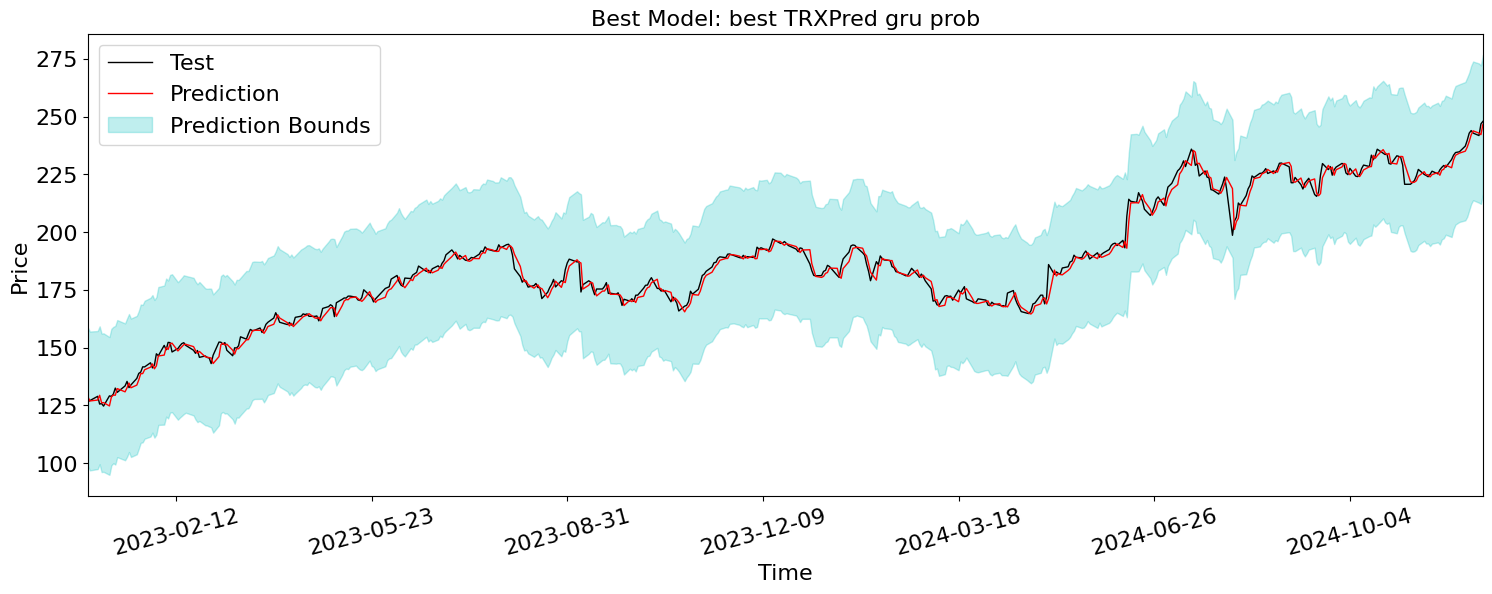

In [ ]:
plot_prediction(y_train, y_test, y_pred_best[m_name_], model_name = m_name_.replace('_', ' '))

# Residuals vs. Predicted Values Visualization

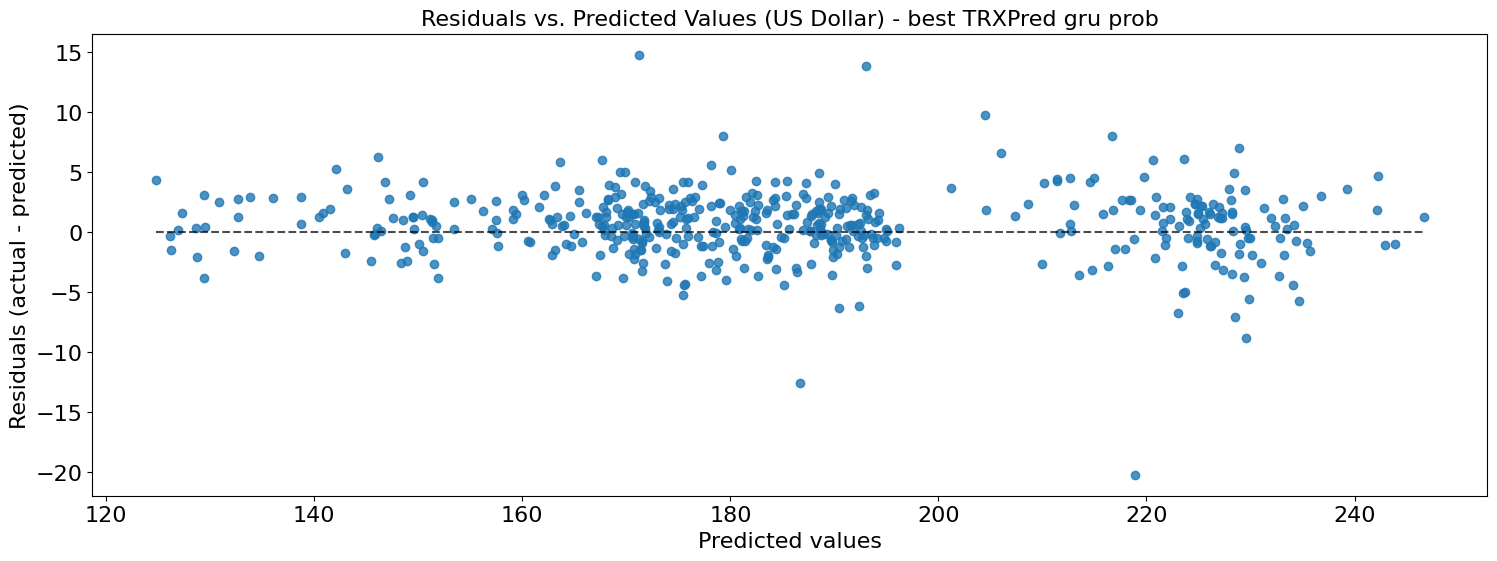

In [ ]:
PredictionErrorDisplay.from_predictions(y_true = denormalize(y_test, close_minmax),
                                        y_pred = denormalize(y_pred_best[m_name_].mean(axis = 1), close_minmax)[:, np.newaxis])
plt.title(f'Residuals vs. Predicted Values (US Dollar) - {m_name_.replace("_", " ")}')
plt.show()

# Models Evaluation Results

In [ ]:
df = pd.DataFrame.from_dict(transfer_model_test_result, orient = 'index')
df

r2_score  mean_absolute_percentage_error  \
best_TRXPred_gru_prob  0.988702                        0.011023   

                       explained_variance_score  mean_squared_log_error  \
best_TRXPred_gru_prob                  0.989251                0.000228   

                       mean_poisson_deviance  max_error  mean_absolute_error  \
best_TRXPred_gru_prob               0.042913  20.224365              2.04844   

                       root_mean_squared_error  
best_TRXPred_gru_prob                 2.853266

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = denormalize(y_test, close_minmax)
y_pred = denormalize(y_pred_best[m_name_].mean(axis = 1), close_minmax)[:, np.newaxis]

# Calculate Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print Metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 2.05
RMSE: 2.85
MAPE: 1.10%


# References

Golnari, A., Komeili, M. H., & Azizi, Z. (2024). Probabilistic deep learning and transfer learning for robust cryptocurrency price prediction. Expert Systems with Applications, 255, 124404. https://doi.org/10.1016/j.eswa.2024.124404